In [1]:
#import libraries
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import numpy as np
from statsmodels.sandbox.stats.multicomp import multipletests
# from matplotlib.pyplot import figure

T =10
arg =2
for i in range((arg-1)*T+1, (arg)*T+1):
    print(i)

In [2]:
repos = pd.read_csv("/home/bm7mp/git/oss-2020/Pydata/repo_slugs.csv")

In [6]:
Resolution_Limit= np.sqrt(30201802/2)
print("Resolution Limit:", Resolution_Limit)

Resolution Limit: 3885.9877766148466


In [5]:
count = 0
for i in test_list : 
    if i > k : 
        count = count + 1

NameError: name 'test_list' is not defined

In [7]:
repos["slug"].describe()

count                     28245840
unique                     1963408
top       lopesdiego12/Hello-World
freq                        198720
Name: slug, dtype: object

In [8]:
repos["login"].describe()

count         28116893
unique         1336927
top       hectorsector
freq             64356
Name: login, dtype: object

In [9]:
repos.head(5)

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions
0,0,0000marcosg/bordes,etag,0,2018-11-04 18:48:59,0000marcosg,5,1335,3
1,1,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,SafariMonkey,1,1,1
2,2,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,ProGamerGov,34,314,71
3,3,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,0000sir,12,303,35
4,4,0000sir/vanGogh,javascript,1201,2016-09-01 03:11:43,0000sir,2,23,0


# How many repos have language data?

In [ ]:
#language_per_repo.loc[language_per_repo!=0].count()

## Histogram of language used in the repos

In [ ]:
# #create count plot for room types
# %matplotlib inline
# # from matplotlib.pyplot import figure
# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# sns.set(style="darkgrid")
# ax = sns.countplot(x='language', data=repos,
#                    order = repos['language'].value_counts().indbex)
# ax.set(xlabel='Language', ylabel='Repo count')
# plt.xticks(rotation=70)
# plt.tight_layout()
# plt.show()
# plt.savefig('no_language_per_repo.png')

Another way to plot 5 first popular language:
    

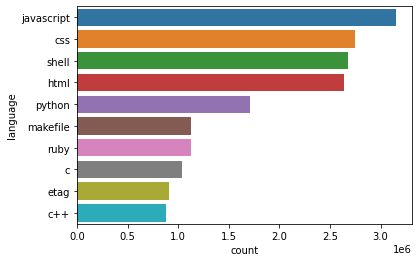

In [10]:
sns.countplot(y="language", data=repos,
              order = repos['language'].value_counts().iloc[:10].index)
plt.savefig('no_language_per_repo_top10.png')

# What is the distribution of repos that have multiple languages?

In [15]:
rep_no_language = repos.groupby("slug")["language"].nunique()

In [16]:
#One_languege_perrepo = repos.groupby("slug")

In [17]:
One_languege_repos = repos[repos.groupby('slug').language.transform('count')<2].copy() #70 percent of the data has one langue per repo

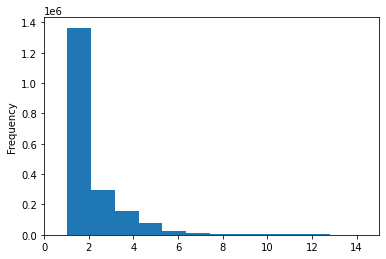

In [18]:
rep_no_language.plot.hist(bins = 200, xlim=(0,15))
plt.savefig('no_repos_no_unique_langs.png')

# What is the distribution of bytes per language?

In [19]:
Most_popular_languages = repos.groupby("language")["bytes"].count().nlargest(10)

In [20]:
Languages = Most_popular_languages.index

In [21]:
for l in Languages:
    print(l)

javascript
css
shell
html
python
makefile
ruby
c
etag
c++


In [22]:
# plt.figure(figsize=(15,6))
# for l in Languages:
#     py = g.get_group(l)
#     plt.hist(py.bytes, histtype='stepfilled', bins=50, alpha=0.2,
#              label=l+" bytes",  density=True)
#     plt.legend(loc="upper left")
# plt.savefig('bytes_lang_hist.png')

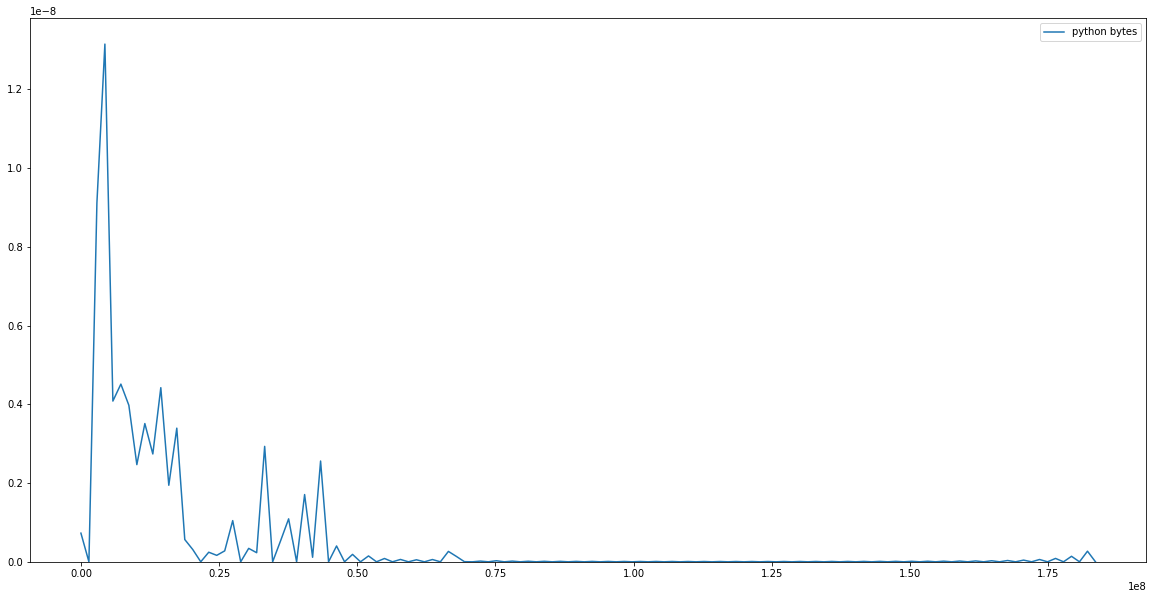

In [23]:

## This block of code is copied from Student240's answer:
import random 



###split the data into groups based on types
g = repos.groupby('language')

## From here things change as I make use of the seaborn library
python = g.get_group('python')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=python['bytes'], label='python bytes', ax=ax)

plt.savefig('bytes_py_density.png')
plt.show()

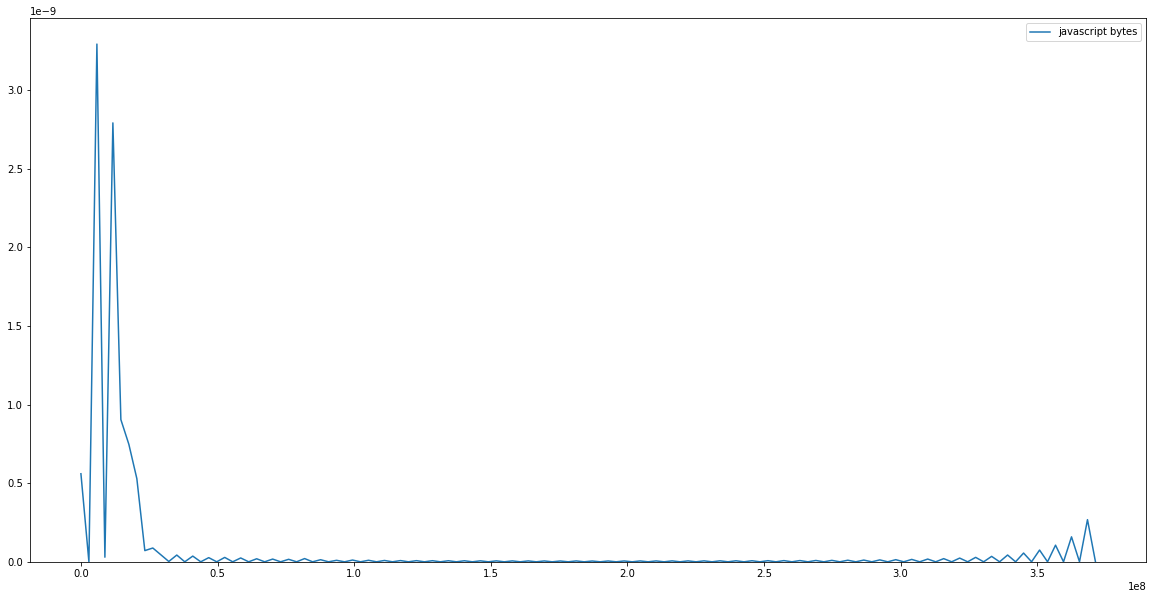

In [24]:

## This block of code is copied from Student240's answer:
import random 


###split the data into groups based on types
g = repos.groupby('language')

## From here things change as I make use of the seaborn library
javascript = g.get_group('javascript')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=javascript['bytes'], label='javascript bytes', ax=ax)

plt.savefig('bytes_java_density.png')
plt.show()

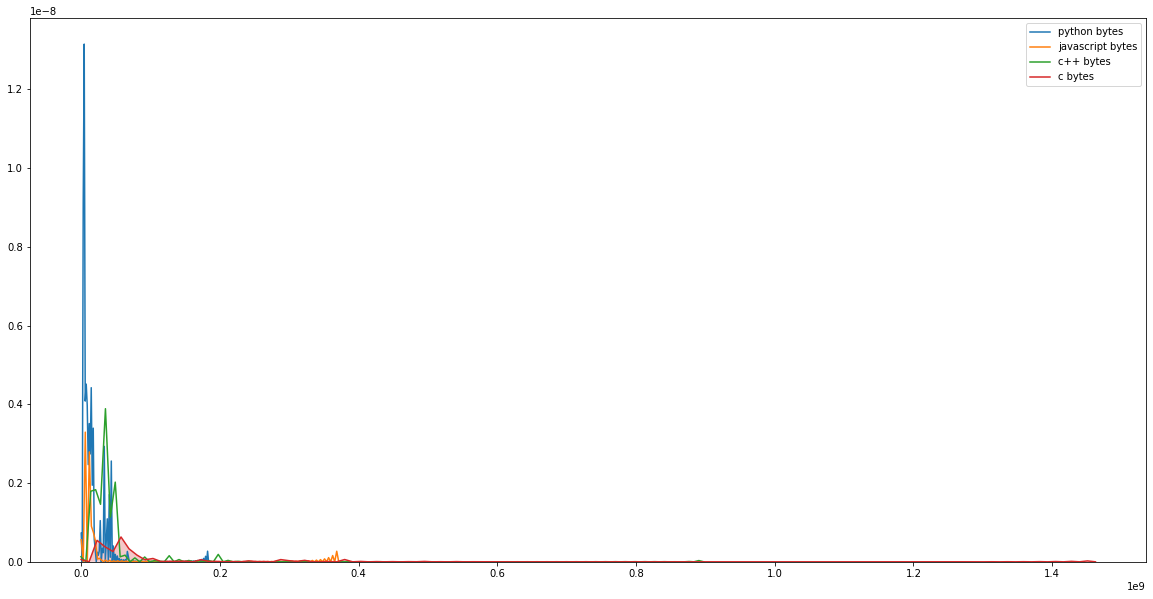

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



## This block of code is copied from Student240's answer:
import random 
###split the data into groups based on types
g = repos.groupby('language')   

## From here things change as I make use of the seaborn library
python = g.get_group('python')
javascript = g.get_group('javascript')
c = g.get_group('c')
cplus = g.get_group('c++')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=python['bytes'], label='python bytes', ax=ax)
ax = sns.kdeplot(data=javascript['bytes'], label='javascript bytes', ax=ax)
ax = sns.kdeplot(data=cplus['bytes'], label='c++ bytes', ax=ax)

# for this final one I use the shade option just to show how it is done:
ax = sns.kdeplot(data=c['bytes'], label='c bytes', ax=ax, shade=True)

# ax.set_xtitle('Count')
# ax.set_ytitle('Density')
# ax.set_title('KDE plot example from seaborn')
plt.savefig('bytes_lang_density.png')

# What is the distribution of communities that have multiple languages?

In [25]:
# new data frame with split value columns
new = One_languege_repos["slug"].str.split("/",expand = True)
  
# making separate contributor column from new data frame 

One_languege_repos["Repo"]= new[1]

In [26]:
Membership_LRN = pd.read_pickle("mem_luv_rnbrw.pickle")
CNM = pd.read_pickle('CNM.pkl')
louvain = pd.read_pickle("memdict_risolate.pickle") 
#dictionary with key:0,1,.. membership and value is list of users
Membership_LRN_rev = {val: key for key in Membership_LRN for val in Membership_LRN[key]}
# Membership_LRN_rev: key: slugs, value: membership
CNM_rev = {val: key for key in CNM for val in CNM[key]}
Louvain_rev = {val: key for key in louvain for val in louvain[key]}

In [27]:
One_languege_repos['Membership'] = One_languege_repos['login'].map(Membership_LRN_rev)

In [28]:
One_languege_repos['CNM'] = One_languege_repos['login'].map(CNM_rev)

In [29]:
One_languege_repos['Louvain'] = One_languege_repos['login'].map(Louvain_rev)

In [30]:
#only community with more than 2 members

In [31]:
One_languege_repos_m = One_languege_repos[One_languege_repos.groupby('Membership').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [32]:
One_languege_repos_cnm = One_languege_repos[One_languege_repos.groupby('CNM').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [33]:
One_languege_repos_Louvain = One_languege_repos[One_languege_repos.groupby('Louvain').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [34]:
repos['Membership'] = repos['login'].map(Membership_LRN_rev)

In [35]:
repos['CNM'] = repos['login'].map(CNM_rev)

In [36]:
repos['Louvain'] = repos['login'].map(Louvain_rev)

In [37]:
repos_m = repos[repos.groupby('Membership').login.transform('count')>1].copy() # keep communities with groups with more than one member, all

In [38]:
repos_cnm = repos[repos.groupby('CNM').login.transform('count')>1].copy() # keep communities with groups with more than one member, all

In [39]:
repos_Louvain =  repos[repos.groupby('Louvain').login.transform('count')>1].copy() # keep communities with groups with more than one member, al

In [40]:
single_member_percent_rnbrw =(len(pd.unique(One_languege_repos['Membership']))-len(pd.unique(One_languege_repos_m['Membership'])))/(len(pd.unique(One_languege_repos['Membership'])))
print('single_member_percent_rnbrw:',single_member_percent_rnbrw)

single_member_percent_rnbrw: 0.6903757249726822


In [41]:
single_member_percent_Louvain =(len(pd.unique(One_languege_repos['Louvain']))-len(pd.unique(One_languege_repos_Louvain['Louvain'])))/len(pd.unique(One_languege_repos['Louvain']))
print('single_member_percent_Louvain:',single_member_percent_Louvain)

single_member_percent_Louvain: 0.6889977026143242


In [42]:
print ("number of communities found by Louvain in 70% the data",len(pd.unique(One_languege_repos['Louvain'])))
print ("number of communities found by RNBRW_Louvain in 70% the data ",len(pd.unique(One_languege_repos['Membership'])))
#print ("number of communities found by CNM in One_languege70% the data ",len(pd.unique(One_languege_repos['CNM'])))
print ("number of communities with single members in RNBRW", len(pd.unique(One_languege_repos['Membership']))-len(pd.unique(One_languege_repos_m['Membership'])))
print ("number of communities with single members in Louvain",len(pd.unique(One_languege_repos['Louvain']))-len(pd.unique(One_languege_repos_Louvain['Louvain'])))


number of communities found by Louvain in 70% the data 59633
number of communities found by RNBRW_Louvain in 70% the data  59485
number of communities with single members in RNBRW 41067
number of communities with single members in Louvain 41087


In [43]:
print ("number of communities found by Louvain in 70% the data with more than one member",len(pd.unique(One_languege_repos_Louvain['Louvain'])))
print ("number of communities found by RNBRW_Louvain in 70% the data with more than one member",len(pd.unique(One_languege_repos_m['Membership'])))
print ("number of communities found by CNM in One_languege70% the data with more than one member",len(pd.unique(One_languege_repos_cnm['CNM'])))

number of communities found by Louvain in 70% the data with more than one member 18546
number of communities found by RNBRW_Louvain in 70% the data with more than one member 18418
number of communities found by CNM in One_languege70% the data with more than one member 22852


In [44]:
print ("number of communities found by Louvain in all the data ",len(pd.unique(repos['Louvain'])))
print ("number of communities found by RNBRW_Louvain in all the data ",len(pd.unique(repos['Membership'])))
print ("number of communities found by CNM in all the data ",len(pd.unique(repos['CNM'])))

number of communities found by Louvain in all the data  121953
number of communities found by RNBRW_Louvain in all the data  121745
number of communities found by CNM in all the data  132325


In [47]:
print ("number of communities found by Louvain in all the data with more than one member",len(pd.unique(repos_Louvain['Louvain'])))
print ("number of communities found by RNBRW_Louvain in all the data with more than one member",len(pd.unique(repos_m['Membership'])))
print ("number of communities found by CNM in all the data with more than one member",len(pd.unique(repos_cnm['CNM'])))

number of communities found by Louvain in all the data with more than one member 88754
number of communities found by RNBRW_Louvain in all the data with more than one member 88549
number of communities found by CNM in all the data with more than one member 98667


In [48]:
One_languege_repos_m.head(10).dropna()

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain
22,22,00091701/WebChangedNotification-Mono,c#,15828,2016-02-03 12:09:32,DavidHoffmann,1,2,0,WebChangedNotification-Mono,3.0,3.0,11.0
56,56,000paradox000/python_password,python,1073,2016-02-03 12:10:00,000paradox000,1,734,0,python_password,9.0,52347.0,3.0
81,81,00111000/Tic-Tac-Toe,python,14953,2016-09-01 12:03:28,00111000,6,5,5,Tic-Tac-Toe,0.0,0.0,9.0
627,627,00benallen/Deep,java,55408,2015-10-09 20:52:44,00benallen,25,3758,1295,Deep,123000.0,135402.0,123216.0
628,628,00benallen/swift-business-processor,swift,6092,2018-09-03 01:46:26,00benallen,11,2697,591,swift-business-processor,123000.0,135402.0,123216.0
757,757,00firestar00/QueryBuilder,java,19235,2016-02-03 12:16:03,00firestar00,3,943,41,QueryBuilder,5.0,5.0,3.0
945,945,00willo/ipa-scripts,python,1486,2016-02-03 12:18:09,00willo,3,396,0,ipa-scripts,13.0,1.0,7.0
946,946,00willo/nsmnow,shell,306607,2016-02-03 12:18:08,00willo,10,21871,380,nsmnow,13.0,1.0,7.0
951,951,01000101/cloudify-vultr-plugin,python,7514,2016-02-03 12:19:20,01000101,8,482,110,cloudify-vultr-plugin,1.0,1.0,4.0
952,952,01000101/insteon-75790-recorder,javascript,8058,2015-10-09 20:53:07,01000101,11,708,71,insteon-75790-recorder,1.0,1.0,4.0


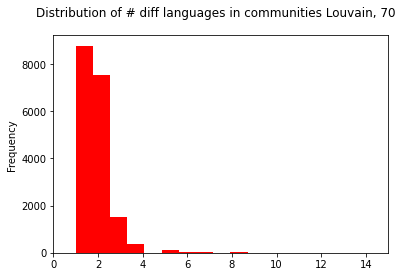

In [49]:
rep_mem_language = One_languege_repos_Louvain.groupby("Louvain")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "RED", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities Louvain, 70")

plt.savefig('no_mem_no_unique Louvain_langs.png')


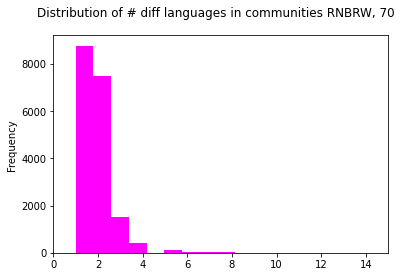

In [50]:
rep_mem_language = One_languege_repos_m.groupby("Membership")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "magenta", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities RNBRW, 70")

plt.savefig('no_mem_no_unique rnbrw_langs.png')

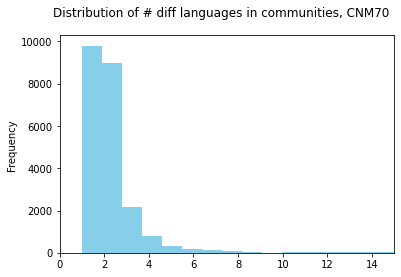

In [51]:
rep_mem_language = One_languege_repos_cnm.groupby("CNM")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "skyblue", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities, CNM70")

plt.savefig('no_mem_no_unique_langscnm.png')

In [52]:
rep_mem_language 

CNM
0.0         158
1.0         180
2.0          97
3.0         111
4.0          87
           ... 
286498.0      2
286501.0      3
286506.0      1
286526.0      1
286541.0      3
Name: language, Length: 22852, dtype: int64

Text(0.5, 0.98, 'Distribution of # diff languages in communities, all')

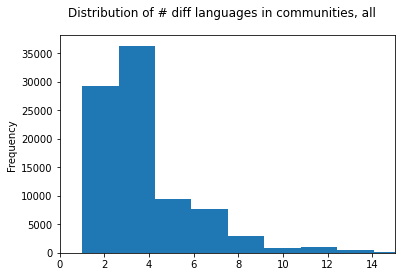

In [53]:
rep_mem_langu_m=repos_m.groupby("Membership")["language"].nunique()
rep_mem_langu_m.plot.hist(bins = 200, xlim=(0,15))
plt.savefig('no_mem_no_unique_langm.png')
plt.suptitle("Distribution of # diff languages in communities, all")

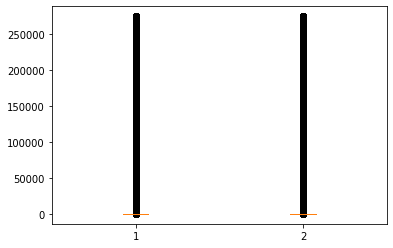

In [54]:
import matplotlib.pyplot as plt
x = [repos_m['Membership'],
     repos_Louvain['Louvain']]
plt.boxplot(x)
plt.show()

## Step0:look at all the lang and repos, porportion as an explatory step, removes repo

## Step 1: one lang assignment per user with all and 70% of the data

## Step 2: Multi lang assignment per user with all and 70% of the data

# Single languge assignment to users rule

## Rule1: Langueges_byte, multi threshold on # of bytes

## Rule2: Langueges_commit, multi: threshold on # of commit

## Rule 3: Lang_majority, multi, threshold on # of lang

## Rule4: Ownership and go by max bytes, for the multi lang byte threshold

Note: remove commuities with single users and two users

# Step 0:

In [55]:
news = repos_m["slug"].str.split("/",expand = True)
  
# making separate contributor column from new data frame 
repos_m["Repo"]= news[1] 

In [56]:
Membership_LRN = pd.read_pickle("mem_luv_rnbrw.pickle")
#dictionary with key:0,1,.. membership and value is list of users
Membership_LRN_rev = {val: key for key in Membership_LRN for val in Membership_LRN[key]}
# Membership_LRN_rev: key: slugs, value: membership

In [57]:
repos_m['Membership'] = repos_m['login'].map(Membership_LRN_rev)

In [58]:
len(repos['Membership'])

28245840

In [59]:
step_0 = repos_m[['login', 'language', 'Membership']].dropna()

In [60]:
step_0.head(100)

,login,language,Membership
17,DavidHoffmann,c#,3
22,DavidHoffmann,c#,3
31,000paradox000,python,9
32,000paradox000,shell,9
33,000paradox000,python,9
...,...,...,...
194,0012ff80,html,106658
195,0012ff80,css,106658
196,eigan,vue,7
197,AlbertLucianto,vue,9


In [61]:
len(step_0["login"])

15096290

# Step1, single Languge assignement (all+70%):

## Step1-rule1: number of Langueges_byte:

In this section, I want to assign a language to a user. I had to drift-off of both rulesets: (i) number of times a language is used in different repos, (ii) number of commits; due to the number of ties and not abling to assign one lanhguage. 

For now, let us choose the number of bytes used in the language to choose and assign it to the user.

In [62]:
# repos['max_bytes'] = repos.groupby(["login","language"])['bytes'].transform(max)

In [63]:
One_languege_repos_m['max_bytes_user'] = One_languege_repos_m.groupby(["login","language"])['bytes'].transform(max)# 70%

In [64]:
repos_m['max_bytes_user'] = repos_m.groupby(["login","language"])['bytes'].transform(max)                         # all

In [65]:
repos_lang = One_languege_repos_m.loc[One_languege_repos_m['bytes']==One_languege_repos_m['max_bytes_user']]# 70%

In [66]:
repos_lang_all =repos_m.loc[repos_m['bytes']==repos_m['max_bytes_user']]#all

In [67]:
step1_rule1_70_bytes = repos_lang[['login', 'language', 'Membership']].dropna()# 70

In [113]:
step1_rule1_70_login = repos_lang[['language']].dropna()# 70

In [186]:
Step1_rule1_70_login= step1_rule1_70_login.value_counts(normalize=True)

In [187]:
Step1_rule1_70_login

language  
javascript    0.143142
python        0.138133
java          0.097853
etag          0.096889
ruby          0.071550
                ...   
ncl           0.000005
newlisp       0.000005
nextflow      0.000005
opa           0.000005
netlinx       0.000005
Length: 260, dtype: float64

In [115]:
step1_rule1_all_bytes = repos_lang_all[['login', 'language', 'Membership']].dropna()#all

In [116]:
step1_rule1_70_bytes.head(100)# 70 

,login,language,Membership
22,DavidHoffmann,c#,3.0
56,000paradox000,python,9.0
81,00111000,python,0.0
627,00benallen,java,123000.0
628,00benallen,swift,123000.0
...,...,...,...
11089,0x1fff,shell,39644.0
11092,0x1fff,perl,39644.0
11203,0x2aff,shell,6.0
11249,0x3333,dart,2.0


In [117]:
step1_rule1_70_bytes.shape

(191880, 3)

In [118]:
len(step1_rule1_70_bytes['Membership'].unique())

18418

In [119]:
step1_rule1_70_bytes_group_mem=step1_rule1_70_bytes.groupby(['Membership'])['language'].nunique()
step1_rule1_all_bytes_group_mem=step1_rule1_all_bytes.groupby(['Membership'])['language'].nunique()

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-1 in communities, 70')

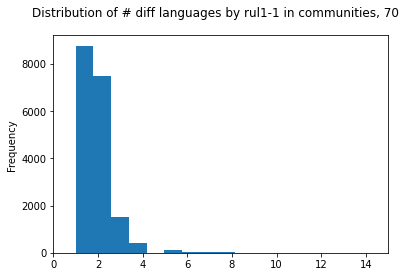

In [120]:
step1_rule1_70_bytes_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule1_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-1 in communities, 70")


Text(0.5, 0.98, 'Distribution of # diff languagesby rul 1-1 in communities, all')

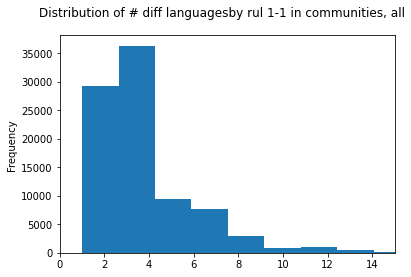

In [121]:
step1_rule1_all_bytes_group_mem.plot.hist(bins = 200, xlim=(0,15))#ALL
plt.savefig('step1_rule1_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languagesby rul 1-1 in communities, all")

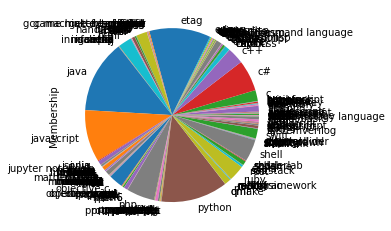

In [122]:
step1_rule1_70_by_lang=step1_rule1_70_bytes.groupby(['language'])['Membership'].nunique()
step1_rule1_70_by_lang.plot.pie(y='sepal length (cm)')

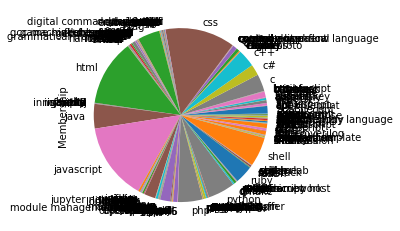

In [123]:
step1_rule1_all_by_lang=step1_rule1_all_bytes.groupby(['language'])['Membership'].nunique()
step1_rule1_all_by_lang.plot.pie(y='sepal length (cm)')

### Top 10 lang using step1-rule1 assignement for both 70 persent of the data vs all:

In [124]:
step1_rule1_70= step1_rule1_70_bytes[['Membership','language']].dropna()


In [125]:
step1_rule1_70_crosstab=pd.crosstab(step1_rule1_70['Membership'],step1_rule1_70['language'])

In [126]:
step1_rule1_70_by_lang=step1_rule1_70.groupby(['language'])['Membership'].nunique()

sns.countplot(y="language", data=bb,
              order = bb['language'].iloc[:10])
plt.savefig('language_step1_com_rule1_70_top10.png')

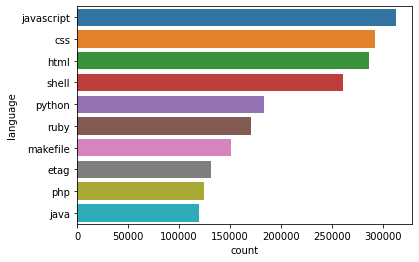

In [127]:
sns.countplot(y="language", data=step1_rule1_all_bytes,
              order = step1_rule1_all_bytes['language'].value_counts().iloc[:10].index)
plt.savefig('language_step1 rule1_all_top5.png')

In [128]:
One_languege_repos_m.loc[One_languege_repos_m.login=='gcushen']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user
262920,262920,aanjhan/academic-kickstart,shell,231,2018-08-07 03:06:31,gcushen,21,811,76,academic-kickstart,4.0,42.0,2.0,231
321346,321346,AbdulYahya/academic-kickstart,shell,231,2018-09-18 03:41:45,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231
340593,340593,abhipatil123/academic-kickstart,shell,231,2018-09-15 14:24:56,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231
751688,751688,ajroyer/academic-kickstart,shell,231,2018-09-18 05:11:05,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231
832786,832786,alanponce/academic-kickstart,shell,231,2018-10-08 01:41:42,gcushen,24,1083,132,academic-kickstart,4.0,42.0,2.0,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428832,27428832,yacca/academic-kickstart,shell,231,2018-09-20 08:01:54,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231
27464329,27464329,yangliustat/mywebsite,shell,231,2018-09-09 19:25:24,gcushen,23,983,103,mywebsite,4.0,42.0,2.0,231
27705103,27705103,yueruchen/academic-kickstart,shell,231,2018-07-31 22:09:37,gcushen,46,1775,720,academic-kickstart,4.0,42.0,2.0,231
28022157,28022157,Zhu-Justin/academic-kickstart,shell,231,2018-09-07 13:29:09,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231


## Ste1-Rule2: number of Langueges_commit (70%-all)

In [129]:
#number_of_communities = len(repos_lang['Membership'].unique())
#print(number_of_communities)

In [130]:
#number_of_communities_all = len(repos_lang_all['Membership'].unique())
#print(number_of_communities)

In [131]:
One_languege_repos_m['max_commit_user'] = One_languege_repos_m.groupby(["login","language"])['commits'].transform(max) #70

In [132]:
repos_m['max_commit_user'] = repos_m.groupby(["login","language"])['commits'].transform(max) #all

In [133]:
repos_lang_commit = One_languege_repos_m.loc[One_languege_repos_m['commits']==One_languege_repos_m['max_commit_user']]#70

In [134]:
repos_lang_commit_all = repos_m.loc[repos_m['commits']==repos_m['max_commit_user']]#all

In [135]:
Step1_rule2_70_commit = repos_lang_commit[['login', 'language', 'Membership']].dropna()#70

In [141]:
Step1_rule2_70_login = repos_lang_commit[[ 'language']].dropna()

In [182]:
Step1_rule2_70_login= Step1_rule2_70_login.value_counts(normalize= True)

In [183]:
Step1_rule2_70_login

language  
javascript    0.143905
python        0.138046
java          0.099859
etag          0.095360
ruby          0.071301
                ...   
ncl           0.000005
newlisp       0.000005
nextflow      0.000005
opa           0.000005
netlinx       0.000005
Length: 260, dtype: float64

In [71]:
Step1_rule2_commit_all = repos_lang_commit_all[['login', 'language', 'Membership']].dropna()#all

In [72]:
#Step1_rule2_70_commit.head(1000)#70

In [73]:
len(Step1_rule2_70_commit['Membership'])#70

197137

In [74]:
#Step1_rule2_commit_all.head()#all

In [75]:
step1_rule2_70_commit_group_mem=Step1_rule2_70_commit.groupby(['Membership'])['language'].nunique()
step1_rule2_all_commits_group_mem= Step1_rule2_commit_all.groupby(['Membership'])['language'].nunique()

In [76]:
#step1_rule2_70_commit_group_mem

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-2 in communities, 70')

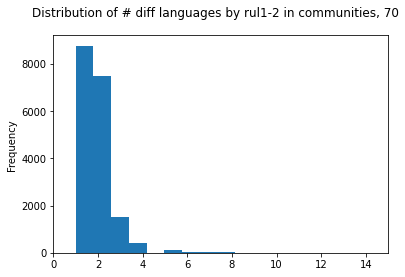

In [77]:
step1_rule2_70_commit_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule2_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-2 in communities, 70")


In [78]:
#step1_rule2_70_commit_group_mem.reset_index()

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-2 in communities, all')

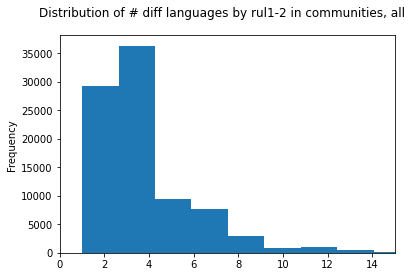

In [79]:
step1_rule2_all_commits_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule2_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-2 in communities, all")

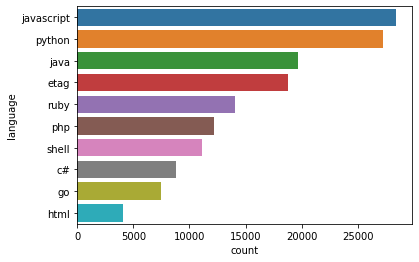

In [80]:
sns.countplot(y="language", data=Step1_rule2_70_commit,
              order = Step1_rule2_70_commit['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule2_70_top10.png')

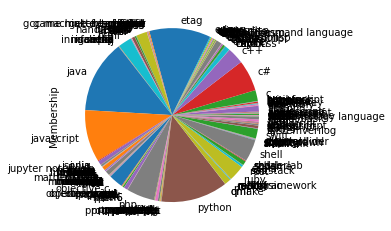

In [91]:
step1_rule2_70_by_lang=Step1_rule2_70_commit.groupby(['language'])['Membership'].nunique()
step1_rule2_70_by_lang.plot.pie(y='sepal length (cm)')

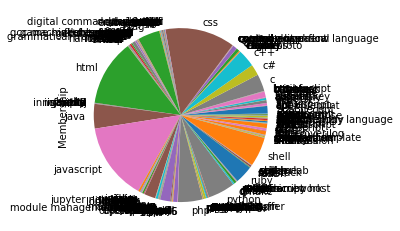

In [92]:
step1_rule2_all_by_lang=Step1_rule2_commit_all.groupby(['language'])['Membership'].nunique()
step1_rule2_all_by_lang.plot.pie(y='sepal length (cm)')

#### Mismatches between rule1 and rule2's assignment:

In [98]:
Step1_rule1_vs_rule2 = Step1_rule2_70_commit.merge(step1_rule1_70_bytes, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'
Step1_rule1_vs_rule2['_merge'].value_counts()

both          199728
right_only         0
left_only          0
Name: _merge, dtype: int64

#### Wilcoxon Signed rank--rank som--Man whittny Step1:rule 1 vs rule2 all and 70

alpha_bonferoni = 0.0001923076923076923
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f71adc756d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f71adb54190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f71adc51790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f71adb54c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f71adb5d1d0>],
 'means': []}

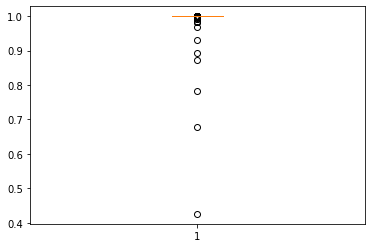

In [89]:
#Step 1 rule2 vs rule2 70
#why dont we do irt by rows
Step1_rule2_70=Step1_rule2_70_commit[['Membership','language']].dropna()
Step1_rule2_70_crosstab=pd.crosstab(Step1_rule2_70['Membership'],Step1_rule2_70['language'])

step1_rule1_vs_rule2_pvalue = dict()
n=0 # number of the tests
for column in step1_rule1_70_crosstab.columns:
    step1_rule1_vs_rule2_pvalue[column] = stats.ranksums(step1_rule1_70_crosstab[column], Step1_rule2_70_crosstab[column]).pvalue
    #step1_rule1_vs_rule2_pvalue[column] = stats.wilcoxon(step1_rule1_70_crosstab[column], Step1_rule2_70_crosstab[column], zero_method = 'pratt', correction=False).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
for i in list(step1_rule1_vs_rule2_pvalue.values()) : 
    if i < alpha_bonf : 
        count = count + 1
        
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step1_rule1_vs_rule2_pvalue.items():
    a.append(step1_rule1_vs_rule2_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

In [328]:
len(Step1_rule1_all_crosstab.columns)

355

alpha_bonferoni = 0.00014084507042253522
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f71ac86e710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f71ac5671d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f71ac8917d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f71ac567c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f71ac573210>],
 'means': []}

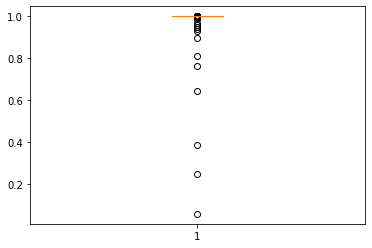

In [90]:
#Step 1 rule2 vs rule2 all

Step1_rule2_all=Step1_rule2_commit_all[['Membership','language']].dropna()
step1_rule1_all=step1_rule1_all_bytes[['Membership','language']].dropna()

Step1_rule2_all_crosstab=pd.crosstab(Step1_rule2_all['Membership'],Step1_rule2_all['language'])
Step1_rule1_all_crosstab=pd.crosstab(step1_rule1_all['Membership'],step1_rule1_all['language'])

step1_rule1_vs_rule2_pvalue_all = dict()
n=0 # number of the tests
for column in Step1_rule1_all_crosstab.columns:
    step1_rule1_vs_rule2_pvalue_all[column] = stats.ranksums(Step1_rule1_all_crosstab[column], Step1_rule2_all_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
for i in list(step1_rule1_vs_rule2_pvalue_all.values()) : 
    if i < alpha_bonf : 
        count = count + 1
        
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
a = []
for k, v in step1_rule1_vs_rule2_pvalue_all.items():
    a.append(step1_rule1_vs_rule2_pvalue_all[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

In [324]:
len(Step1_rule1_all_crosstab.columns)

355

In [126]:
One_languege_repos_m.loc[One_languege_repos_m.login=='gcushen']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user
262920,262920,aanjhan/academic-kickstart,shell,231,2018-08-07 03:06:31,gcushen,21,811,76,academic-kickstart,4.0,42.0,2.0,231,158
321346,321346,AbdulYahya/academic-kickstart,shell,231,2018-09-18 03:41:45,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
340593,340593,abhipatil123/academic-kickstart,shell,231,2018-09-15 14:24:56,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
751688,751688,ajroyer/academic-kickstart,shell,231,2018-09-18 05:11:05,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
832786,832786,alanponce/academic-kickstart,shell,231,2018-10-08 01:41:42,gcushen,24,1083,132,academic-kickstart,4.0,42.0,2.0,231,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428832,27428832,yacca/academic-kickstart,shell,231,2018-09-20 08:01:54,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
27464329,27464329,yangliustat/mywebsite,shell,231,2018-09-09 19:25:24,gcushen,23,983,103,mywebsite,4.0,42.0,2.0,231,158
27705103,27705103,yueruchen/academic-kickstart,shell,231,2018-07-31 22:09:37,gcushen,46,1775,720,academic-kickstart,4.0,42.0,2.0,231,158
28022157,28022157,Zhu-Justin/academic-kickstart,shell,231,2018-09-07 13:29:09,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158


## Step 1-Rule3: number of Langueges_Majority_1

In [143]:
Login_lang_majority= One_languege_repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(One_languege_repos_m,on=["login", "language"],how='right').fillna(value=0)#70

In [144]:
Login_lang_majority_all=repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(repos_m,on=["login", "language"],how='right').fillna(value=0)#all

In [145]:
Login_lang_majority['max-Lang-count']= Login_lang_majority.groupby(["login","language"])['Lng-count'].transform(max)#70

In [146]:
Login_lang_majority_all['max-Lang-count']= Login_lang_majority_all.groupby(["login","language"])['Lng-count'].transform(max)#all

In [147]:
Login_lang_majorit= Login_lang_majority.loc[Login_lang_majority['Lng-count']==Login_lang_majority['max-Lang-count']] #this does not resolve ties, see example below, and reslove#70
#Login_lang_majorit = Login_lang_majorit.reset_index

In [148]:
Login_lang_majorit_doup = Login_lang_majorit.sort_values('bytes', ascending=False).drop_duplicates(subset=["login", 'max-Lang-count'])#70 this resloves above by selecting douplicates on maxlangcount that have max byte

In [149]:
Login_lang_majorit_all= Login_lang_majority_all.loc[Login_lang_majority_all['Lng-count']==Login_lang_majority_all['max-Lang-count']]#all #this does not resolve ties, see example below#all, below reolves
#Login_lang_majorit_all = Login_lang_majorit_all.reset_index()

In [150]:
Login_lang_majorit_doup_all = Login_lang_majorit_all.sort_values('bytes', ascending=False).drop_duplicates(subset=["login", 'max-Lang-count'])#all this resloves above by selecting douplicates on maxlangcount that have max byte

In [151]:
One_languege_repos_m.loc[One_languege_repos_m.login=='0-Eclipse-0']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user
4637,4637,0-Eclipse-0/EclipseBot,lua,72809,2016-05-01 23:52:18,0-Eclipse-0,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9
4640,4640,0-Eclipse-0/SaltBot-Python,batchfile,78,2016-02-03 12:00:37,0-Eclipse-0,12,710,14,SaltBot-Python,38.0,2.0,33.0,78,12
4641,4641,0-Eclipse-0/Tic-Tac-Toe,c#,1,2016-02-03 12:00:43,0-Eclipse-0,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0,1,6


In [152]:
Login_lang_majorit.loc[Login_lang_majorit .login=='0-Eclipse-0']#70 issue

,login,language,Lng-count,Unnamed: 0,slug,bytes,created_at,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user,max-Lang-count
71,0-Eclipse-0,lua,1,4637,0-Eclipse-0/EclipseBot,72809,2016-05-01 23:52:18,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9,1
72,0-Eclipse-0,batchfile,1,4640,0-Eclipse-0/SaltBot-Python,78,2016-02-03 12:00:37,12,710,14,SaltBot-Python,38.0,2.0,33.0,78,12,1
73,0-Eclipse-0,c#,1,4641,0-Eclipse-0/Tic-Tac-Toe,1,2016-02-03 12:00:43,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0,1,6,1


In [153]:
Login_lang_majorit_doup .loc[Login_lang_majorit_doup .login=='0-Eclipse-0']#70###YEEESSS, issue fixrd

,login,language,Lng-count,Unnamed: 0,slug,bytes,created_at,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user,max-Lang-count
71,0-Eclipse-0,lua,1,4637,0-Eclipse-0/EclipseBot,72809,2016-05-01 23:52:18,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9,1


In [154]:
One_languege_repos.loc[One_languege_repos.login=='0-Eclipse-0']

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain
4637,4637,0-Eclipse-0/EclipseBot,lua,72809,2016-05-01 23:52:18,0-Eclipse-0,9,3433,12,EclipseBot,38.0,2.0,33.0
4640,4640,0-Eclipse-0/SaltBot-Python,batchfile,78,2016-02-03 12:00:37,0-Eclipse-0,12,710,14,SaltBot-Python,38.0,2.0,33.0
4641,4641,0-Eclipse-0/Tic-Tac-Toe,c#,1,2016-02-03 12:00:43,0-Eclipse-0,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0


In [155]:
#Login_lang_majorit['Membership'] = Login_lang_majorit['login'].map(Membership_LRN_rev)#70

In [156]:
#Login_lang_majorit_all['Membership'] = Login_lang_majorit_all['login'].map(Membership_LRN_rev)#all

In [157]:
#keeping those that we assigned to a community:
Step1_rule3_70_majority = Login_lang_majorit_doup[['login', 'language', 'Membership']].dropna()#70

In [159]:
Step1_rule3_70_login = Step1_rule3_70_majority [[ 'language']].dropna()

In [184]:
Step1_rule3_70_login= Step1_rule3_70_login.value_counts(normalize= True)

In [185]:
Step1_rule3_70_login

language       
javascript         0.148708
python             0.143487
java               0.108803
etag               0.088059
ruby               0.076849
                     ...   
netlinx            0.000006
gettext catalog    0.000006
nextflow           0.000006
chuck              0.000006
1c enterprise      0.000006
Length: 242, dtype: float64

In [176]:
#keeping those that we assigned to a community:
Step1_rule3_all_majority = Login_lang_majorit_doup_all[['login', 'language', 'Membership']].dropna()#all

In [104]:
#rule3_70_majority = pd.merge(Login_lang_majorit,One_languege_repos[['login','language','Membership']],on='login', how='left').dropna()

In [105]:
#rule3_70_majority.head(50)

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-3 in communities, 70')

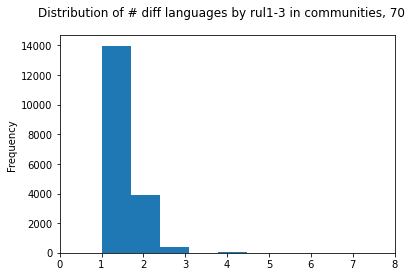

In [106]:
step1_rule3_70_group_mem=Step1_rule3_70_majority.groupby(['Membership'])['language'].nunique()
step1_rule3_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step1_rule3_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-3 in communities, 70")


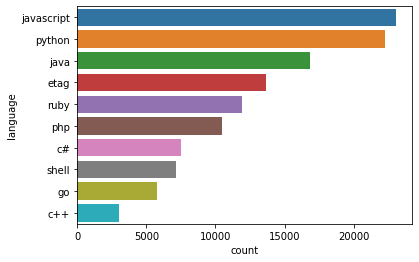

In [145]:
sns.countplot(y="language", data=Step1_rule3_70_majority,
              order = Step1_rule3_70_majority['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule3_70_top10.png')

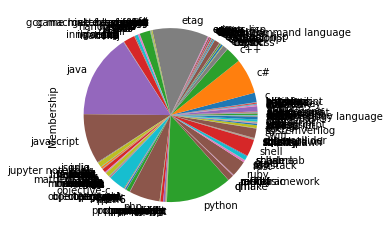

In [107]:
step1_rule3_70_by_lang=Step1_rule3_70_majority.groupby(['language'])['Membership'].nunique()
step1_rule3_70_by_lang.plot.pie(y='sepal length (cm)')

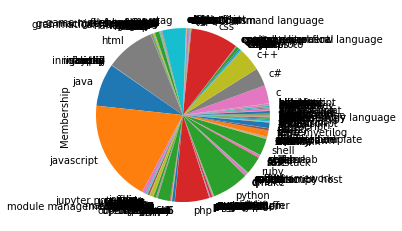

In [108]:
step1_rule3_all_by_lang=Step1_rule3_all_majority.groupby(['language'])['Membership'].nunique()
step1_rule3_all_by_lang.plot.pie(y='sepal length (cm)')

#### Mismatches between rule1, rule2, rule3's assignment:

In [146]:
Step1_rule1_vs_rule3 = Step1_rule3_70_majority.merge(step1_rule1_70_bytes, how = 'left' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'
Step1_rule1_vs_rule3['_merge'].value_counts()

both          156525
right_only         0
left_only          0
Name: _merge, dtype: int64

In [147]:
Step1_rule2_vs_rule3 = Step1_rule2_70_commit.merge(Step1_rule3_70_majority, how = 'left' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only
Step1_rule2_vs_rule3['_merge'].value_counts()

both          161563
right_only         0
left_only          0
Name: _merge, dtype: int64

In [152]:
stats.ranksums(step1_rule1_70_crosstab['python'], Step1_rule3_70_crosstab['python'])

RanksumsResult(statistic=9.347788467895256, pvalue=8.94994495392961e-21)

#### Wilcoxon rank som--Man whittny Step1:rule 1 vs rule3 all and 70

In [207]:
#Step1_rule3vs1_70_nonshared_columns

alpha_bonferoni = 0.0002066115702479339
number of rejected nulls with bonferoni adjustment =  5
number of rejected nulls =  11
rejected nulls: {'etag': 2.3335721365373403e-28, 'java': 4.18426242424908e-08, 'javascript': 5.302169373365433e-16, 'python': 4.489233795197686e-22, 'shell': 1.502696739840289e-07}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb82a7f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb82ad1650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb7134ee90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb82ac0210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb82ea3e10>],
 'means': []}

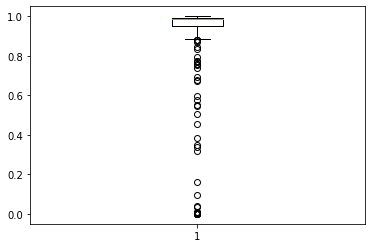

In [287]:
#Step 1 rule2 vs rule3 70
Step1_rule3vs2_70_nonshared_columns=set(Step1_rule2_70_crosstab.columns)-set(Step1_rule3_70_crosstab.columns).intersection(set(Step1_rule2_70_crosstab.columns))
Step1_rule3_70=Step1_rule3_70_majority[['Membership','language']].dropna()

Step1_rule3_70_crosstab=pd.crosstab(Step1_rule3_70['Membership'],Step1_rule3_70['language'])
Step1_rule2_vs_rule3_pvalue = dict()
n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
Step1_rule2_70_crosstab_r3=Step1_rule2_70_crosstab.drop(columns=Step1_rule3vs2_70_nonshared_columns)

for column in Step1_rule2_70_crosstab_r3.columns:
    Step1_rule2_vs_rule3_pvalue[column] = stats.ranksums(Step1_rule2_70_crosstab_r3[column], Step1_rule3_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_Step1_rule2vs3={}
for j,i in list(Step1_rule2_vs_rule3_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_Step1_rule2vs3[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k)  
print('rejected nulls:', rejected_nulls_Step1_rule2vs3)
a = []
for k, v in Step1_rule2_vs_rule3_pvalue.items():
    a.append(Step1_rule2_vs_rule3_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.0002066115702479339
number of rejected nulls with bonferoni adjustment =  5
number of rejected nulls =  11
rejected nulls: {'etag': 7.738039666037671e-28, 'java': 1.778637568165514e-06, 'javascript': 2.7213470221559956e-15, 'python': 8.94994495392961e-21, 'shell': 1.609151389623633e-07}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb8995fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb8995d990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb86dcf850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb899573d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb89955910>],
 'means': []}

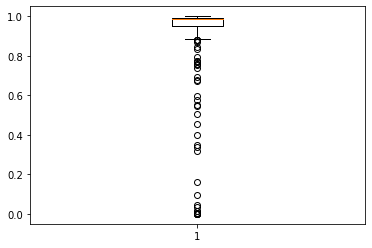

In [288]:
#Step 1 rule1 vs rule3 70
Step1_rule3vs1_70_nonshared_columns=set(step1_rule1_70_crosstab.columns)-set(Step1_rule3_70_crosstab.columns).intersection(set(step1_rule1_70_crosstab.columns))
Step1_rule3_70=Step1_rule3_70_majority[['Membership','language']].dropna()

Step1_rule3_70_crosstab=pd.crosstab(Step1_rule3_70['Membership'],Step1_rule3_70['language'])
step1_rule1_vs_rule3_pvalue = dict()
n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
step1_rule1_70_crosstab_r3=step1_rule1_70_crosstab.drop(columns=Step1_rule3vs1_70_nonshared_columns)

for column in step1_rule1_70_crosstab_r3.columns:
    step1_rule1_vs_rule3_pvalue[column] = stats.ranksums(step1_rule1_70_crosstab_r3[column], Step1_rule3_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step1_rule1vs3={}
for j,i in list(step1_rule1_vs_rule3_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule1vs3[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k)  
print('rejected nulls:', rejected_nulls_step1_rule1vs3)
a = []
for k, v in step1_rule1_vs_rule3_pvalue.items():
    a.append(step1_rule1_vs_rule3_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

In [207]:
# df =Step1_rule2_70_commit.set_index('login').join(Step1_rule3_70_majority.set_index('login'))

## Step1-Rule4: by ownership, only owners be assigned languge_1(70% + all)

In [161]:
# creat a column with owners name#70
new = One_languege_repos_m["slug"].str.split("/",expand = True)
  
# making separate owner column from new data frame #70
One_languege_repos_m["owner"]= new[0] 

In [162]:
# creat a column with owners name#all
new = repos_m["slug"].str.split("/",expand = True)
  
# making separate owner column from new data frame #all
repos_m["owner"]= new[0] 

In [163]:
ownership = One_languege_repos_m.loc[(One_languege_repos_m['owner'] ==One_languege_repos_m['login'])]#70

In [164]:
ownership_all = repos_m.loc[(repos_m['owner'] ==repos_m['login'])]#all

In [165]:
#if owner and login the same, keep the row, or bytes>100, i.e keep all if they own, if they don’t own use rule byte threshold

#repos_ownership = One_languege_repos.loc[(One_languege_repos['owner'] ==One_languege_repos['login']) | (One_languege_repos['bytes'] > 100)]# for multi

In [166]:
ownership['Membership'] = ownership['login'].map(Membership_LRN_rev)#70

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
ownership_all['Membership'] = ownership_all['login'].map(Membership_LRN_rev)#all

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
Step1_rule4_70_ownership = ownership[['login', 'language', 'Membership']]#70

In [170]:
Step1_rule4_70_login = Step1_rule4_70_ownership [['language']].dropna()

In [173]:
Step1_rule4_70_login =Step1_rule4_70_login.value_counts(normalize= True)

In [174]:
Step1_rule4_70_login

language  
javascript    0.177983
python        0.139780
java          0.104323
ruby          0.083649
etag          0.073536
                ...   
ecl           0.000004
nesc          0.000004
newlisp       0.000004
boo           0.000004
zephir        0.000004
Length: 252, dtype: float64

In [267]:
Step1_rules_comparison= pd.concat([Step1_rule4_70_login, Step1_rule3_70_login, Step1_rule2_70_login, Step1_rule1_70_login], axis= 1 )

In [269]:
#Step1_rules_comparison.reset_index(inplace=True) #this convert the index laguge to column

In [272]:
 Step1_rules_comparison.loc[['python','java', 'javascript','etag']]

,0,1,2,3
language,,,,
python,0.143487,0.143487,0.138046,0.138133
java,0.108803,0.108803,0.099859,0.097853
javascript,0.148708,0.148708,0.143905,0.143142
etag,0.088059,0.088059,0.095360,0.096889


In [292]:
Step1_login_pvalues = dict()
n =0
for column in Step1_rules_comparison.columns():
    Step1_login_pvalues[column] = stats.wilcoxon(Step1_rules_comparison[column],  Step1_rules_comparison[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_Step1_login={}
for j,i in list(Step1_login_pvalues.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_Step1_login[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_Step1_login)
#a= list(step1_rule1_vs_rule2_pvalue.values())

TypeError: 'RangeIndex' object is not callable

In [271]:
# Step1_rules_comparison.loc[Step1_rules_comparison['language']=='python' ] # if idex. converted to column

In [252]:
Step1_rules_comparison[3].nlargest(10)

111    0.143142
195    0.138133
110    0.097853
70     0.096889
208    0.071550
177    0.061809
217    0.058073
33     0.043418
88     0.037800
99     0.020643
Name: 3, dtype: float64

In [241]:
#Step1_rules_comparison= pd.merge(Step1_rule4_70_login, Step1_rule3_70_login, Step1_rule2_70_login, Step1_rule1_70_login, on = ['language'], how = 'inner'  )

In [304]:
Step1_rule4_all_ownership = ownership_all[['login', 'language', 'Membership']].dropna()#all

In [229]:
Step1_rule4_70_ownership.head(100)

,login,language,Membership
56,000paradox000,python,9
81,00111000,python,0
627,00benallen,java,123000
628,00benallen,swift,123000
757,00firestar00,java,5
...,...,...,...
9763,0x00-0x00,shell,4
9764,0x00-0x00,python,4
9794,0x010C,python,1
9805,0x010C,python,1


Text(0.5, 0.98, 'Distribution of # diff languages by rul1-4 in communities, 70')

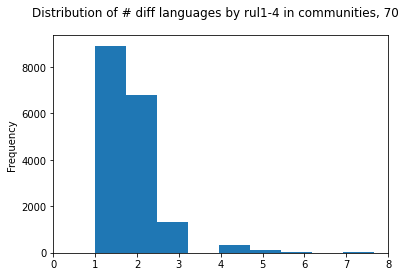

In [230]:
step1_rule4_70_group_mem=Step1_rule4_70_ownership.groupby(['Membership'])['language'].nunique()
step1_rule4_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step1_rule4_70_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-4 in communities, 70")

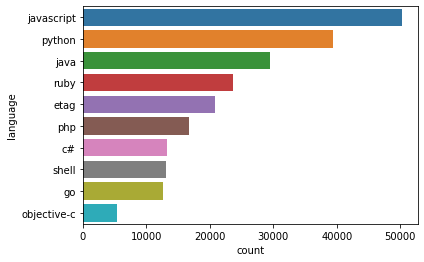

In [231]:
sns.countplot(y="language", data=Step1_rule4_70_ownership,
              order = Step1_rule4_70_ownership['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule3_70_top10.png')

#### Mismatches between rule1, rule2, rule3', rule4 s assignment:

In [232]:
Step1_rule1_vs_rule4 = Step1_rule4_70_ownership.merge(step1_rule1_70_bytes, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'
Step1_rule1_vs_rule4['_merge'].value_counts()

both          286000
right_only         0
left_only          0
Name: _merge, dtype: int64

In [233]:
Step1_rule3_vs_rule4 = Step1_rule4_70_ownership.merge(Step1_rule3_70_majority, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'
Step1_rule3_vs_rule4['_merge'].value_counts()

both          247945
right_only         0
left_only          0
Name: _merge, dtype: int64

In [234]:
Step1_rule2_vs_rule4 = Step1_rule4_70_ownership.merge(Step1_rule2_70_commit, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'
Step1_rule2_vs_rule4['_merge'].value_counts()

both          303478
right_only         0
left_only          0
Name: _merge, dtype: int64

#### Wilcoxon rank som--Man whittny Step1:rule 4 vs rule1, vs 3, vs 2 all and 70

In [278]:
len(Step1_rule4vs1_70_nonshared_rows)

793

alpha_bonferoni = 0.0001984126984126984
number of rejected nulls with bonferoni adjustment =  1
number of rejected nulls =  2
rejected nulls: {'java': 3.1137756683035746e-05}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb8f081f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb8f07ed10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb8d2d64d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb8f1e5950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb8f6a3f90>],
 'means': []}

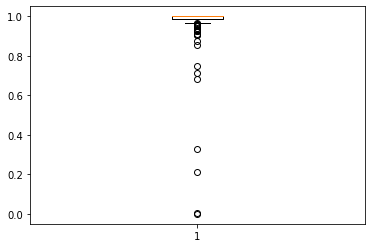

In [289]:
#Step 1 rule4 vs rule1 70
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule4vs1_70_nonshared_rows=set(step1_rule1_70_crosstab.index)-set(step1_rule1_70_crosstab.index).intersection(set(Step1_rule4_70_crosstab.index))# index is the membership here
Step1_rule4vs1_70_nonshared_columns=set(step1_rule1_70_crosstab.columns)-set(Step1_rule4_70_crosstab.columns).intersection(set(step1_rule1_70_crosstab.columns))

Step1_rule4_70=Step1_rule4_70_ownership[['Membership','language']].dropna()
Step1_rule4_70_crosstab=pd.crosstab(Step1_rule4_70['Membership'],Step1_rule4_70['language']).dropna()

step1_rule1_vs_rule4_pvalue = dict()
n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
step1_rule1_70_crosstab_r4=step1_rule1_70_crosstab.drop(columns=Step1_rule4vs1_70_nonshared_columns ) 
step1_rule1_70_crosstab_r4=step1_rule1_70_crosstab_r4.drop(index=Step1_rule4vs1_70_nonshared_rows )

for column in step1_rule1_70_crosstab_r4.columns:
    step1_rule1_vs_rule4_pvalue[column] = stats.ranksums(step1_rule1_70_crosstab_r4[column], Step1_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule1vs4={}
for j,i in list(step1_rule1_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule1vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule1vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step1_rule1_vs_rule4_pvalue.items():
    a.append(step1_rule1_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00014204545454545457
number of rejected nulls with bonferoni adjustment =  3
number of rejected nulls =  5
rejected nulls: {'css': 8.12869403196389e-09, 'html': 6.741448289723944e-05, 'javascript': 1.0587722170620702e-49}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb9db08210>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb9dbe6e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb9d615f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb9dd9cb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb9dd9c1d0>],
 'means': []}

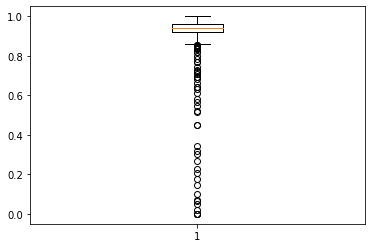

In [344]:
#Step 1 rule4 vs rule1 all
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule4_all=Step1_rule4_all_ownership[['Membership','language']].dropna()
Step1_rule4_all_crosstab=pd.crosstab(Step1_rule4_all['Membership'],Step1_rule4_all['language']).dropna()
step1_rule1_all=step1_rule1_all_bytes[['Membership','language']].dropna()

Step1_rule1_all_crosstab=pd.crosstab(step1_rule1_all['Membership'],step1_rule1_all['language'])

Step1_rule4vs1_all_nonshared_rows=set(Step1_rule1_all_crosstab.index)-set(Step1_rule1_all_crosstab.index).intersection(set(Step1_rule4_all_crosstab.index))# index is the membership here
Step1_rule4vs1_all_nonshared_columns=set(Step1_rule1_all_crosstab.columns)-set(Step1_rule4_all_crosstab.columns).intersection(set(Step1_rule1_all_crosstab.columns))


step1_rule1_vs_rule4_pvalue_all = dict()
n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
step1_rule1_all_crosstab_r4=Step1_rule1_all_crosstab.drop(columns=Step1_rule4vs1_all_nonshared_columns ) 
step1_rule1_all_crosstab_r4=step1_rule1_all_crosstab_r4.drop(index=Step1_rule4vs1_all_nonshared_rows )

len(Step1_rule1_all_crosstab.columns)
for column in step1_rule1_all_crosstab_r4.columns:
    step1_rule1_vs_rule4_pvalue_all[column] = stats.ranksums(step1_rule1_all_crosstab_r4[column], Step1_rule4_all_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule1vs4_all={}
for j,i in list(step1_rule1_vs_rule4_pvalue_all.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule1vs4_all[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule1vs4_all)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step1_rule1_vs_rule4_pvalue_all.items():
    a.append(step1_rule1_vs_rule4_pvalue_all[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.0001984126984126984
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  2
rejected nulls: {}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb937c3190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb938f9f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb9321d190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb938f7ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb938f7050>],
 'means': []}

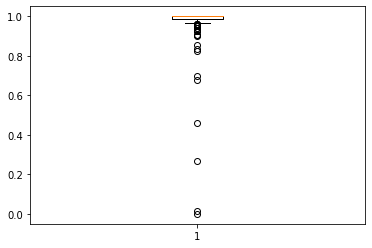

In [298]:
#Step 1 rule4 vs rule2 70
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule4vs2_70_nonshared_rows=set(Step1_rule2_70_crosstab.index)-set(Step1_rule2_70_crosstab.index).intersection(set(Step1_rule4_70_crosstab.index))# index is the membership here
Step1_rule4vs2_70_nonshared_columns=set(Step1_rule2_70_crosstab.columns)-set(Step1_rule4_70_crosstab.columns).intersection(set(Step1_rule2_70_crosstab.columns))

Step1_rule4_70=Step1_rule4_70_ownership[['Membership','language']].dropna()
Step1_rule4_70_crosstab=pd.crosstab(Step1_rule4_70['Membership'],Step1_rule4_70['language']).dropna()

Step1_rule2_vs_rule4_pvalue = dict()

n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
Step1_rule2_70_crosstab_r4=Step1_rule2_70_crosstab.drop(columns=Step1_rule4vs2_70_nonshared_columns ) 
Step1_rule2_70_crosstab_r4=Step1_rule2_70_crosstab_r4.drop(index=Step1_rule4vs2_70_nonshared_rows )

for column in Step1_rule2_70_crosstab_r4.columns:
    Step1_rule2_vs_rule4_pvalue[column] = stats.ranksums(Step1_rule2_70_crosstab_r4[column], Step1_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule2vs4={}
for j,i in list(Step1_rule2_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule2vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule2vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in Step1_rule2_vs_rule4_pvalue.items():
    a.append(Step1_rule2_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00014204545454545457
number of rejected nulls with bonferoni adjustment =  2
number of rejected nulls =  7
rejected nulls: {'css': 4.838327436448425e-07, 'javascript': 7.747680747146166e-40}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbba2fc34d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbba2fc0050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbba1c86b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbba3482f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbba3482750>],
 'means': []}

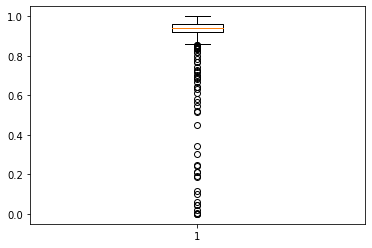

In [347]:
#Step 1 rule4 vs rule2 all
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule4vs2_all_nonshared_rows=set(Step1_rule2_all_crosstab.index)-set(Step1_rule2_all_crosstab.index).intersection(set(Step1_rule4_all_crosstab.index))# index is the membership here
Step1_rule4vs2_all_nonshared_columns=set(Step1_rule2_all_crosstab.columns)-set(Step1_rule4_all_crosstab.columns).intersection(set(Step1_rule2_all_crosstab.columns))

Step1_rule4_all=Step1_rule4_all_ownership[['Membership','language']].dropna()
Step1_rule4_all_crosstab=pd.crosstab(Step1_rule4_all['Membership'],Step1_rule4_all['language']).dropna()

Step1_rule2_vs_rule4_pvalue_all = dict()

n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
Step1_rule2_all_crosstab_r4=Step1_rule2_all_crosstab.drop(columns=Step1_rule4vs2_all_nonshared_columns ) 
Step1_rule2_all_crosstab_r4=Step1_rule2_all_crosstab_r4.drop(index=Step1_rule4vs2_all_nonshared_rows )

for column in Step1_rule2_all_crosstab_r4.columns:
    Step1_rule2_vs_rule4_pvalue_all[column] = stats.ranksums(Step1_rule2_all_crosstab_r4[column], Step1_rule4_all_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule2vs4_all={}
for j,i in list(Step1_rule2_vs_rule4_pvalue_all.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule2vs4_all[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule2vs4_all)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in Step1_rule2_vs_rule4_pvalue_all.items():
    a.append(Step1_rule2_vs_rule4_pvalue_all[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00021186440677966104
number of rejected nulls with bonferoni adjustment =  5
number of rejected nulls =  10
rejected nulls: {'etag': 2.002204963543524e-29, 'java': 2.0772777914767167e-16, 'javascript': 2.6292954079056297e-16, 'python': 2.8862014616479315e-29, 'shell': 2.2097847085689914e-06}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbbce982290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbbce9cb050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbbcd7ac4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbbcee25b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbbcee25350>],
 'means': []}

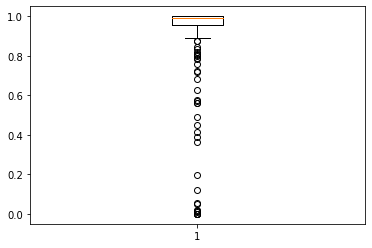

In [348]:
#Step 1 rule4 vs rule3 70
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule3_70=Step1_rule3_70_majority[['Membership','language']].dropna()
Step1_rule3_70_crosstab=pd.crosstab(Step1_rule3_70['Membership'],Step1_rule3_70['language'])

Step1_rule4_70=Step1_rule4_70_ownership[['Membership','language']].dropna()
Step1_rule4_70_crosstab=pd.crosstab(Step1_rule4_70['Membership'],Step1_rule4_70['language']).dropna()

Step1_rule4vs3_70_nonshared_rows=set(Step1_rule3_70_crosstab.index)-set(Step1_rule3_70_crosstab.index).intersection(set(Step1_rule4_70_crosstab.index))# index is the membership here
Step1_rule4vs3_70_nonshared_columns=set(Step1_rule3_70_crosstab.columns)-set(Step1_rule4_70_crosstab.columns).intersection(set(Step1_rule3_70_crosstab.columns))


Step1_rule3_vs_rule4_pvalue = dict()

n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
Step1_rule3_70_crosstab_r4=Step1_rule3_70_crosstab.drop(columns=Step1_rule4vs3_70_nonshared_columns ) 
Step1_rule3_70_crosstab_r4=Step1_rule3_70_crosstab_r4.drop(index=Step1_rule4vs3_70_nonshared_rows )

for column in Step1_rule3_70_crosstab_r4.columns:
    Step1_rule3_vs_rule4_pvalue[column] = stats.ranksums(Step1_rule3_70_crosstab_r4[column], Step1_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule3vs4={}
for j,i in list(Step1_rule3_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule3vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule3vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in Step1_rule3_vs_rule4_pvalue.items():
    a.append(Step1_rule3_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00015151515151515152
number of rejected nulls with bonferoni adjustment =  21
number of rejected nulls =  35
rejected nulls: {'apacheconf': 7.319109546103676e-44, 'asp': 8.348917715101214e-08, 'batchfile': 2.8343099421466906e-26, 'c': 2.6295665396256843e-101, 'c#': 6.172920668870332e-14, 'c++': 9.710140945850941e-70, 'cmake': 1.1299061006032182e-08, 'coffeescript': 1.2639435187998095e-10, 'css': 0.0, 'etag': 3.801684725268283e-194, 'html': 0.0, 'java': 1.1489580664180674e-56, 'javascript': 0.0, 'makefile': 5.71562193718866e-94, 'objective-c': 3.4889974523848344e-26, 'perl': 2.3593467167511273e-12, 'php': 6.794532327485202e-118, 'python': 2.9653085851243483e-166, 'ruby': 6.870877219509878e-129, 'shell': 0.0, 'typescript': 1.7998841032933999e-06}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbdc98fcfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbdc9febc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbdc8b18690>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbdca03cc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbdca03c410>],
 'means': []}

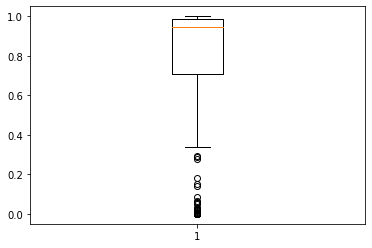

In [350]:
#Step 1 rule4 vs rule3 all
# first reshape the rule 4: drop the non shared membership and languges:
Step1_rule3_all=Step1_rule3_all_majority[['Membership','language']].dropna()
Step1_rule3_all_crosstab=pd.crosstab(Step1_rule3_all['Membership'],Step1_rule3_all['language'])

Step1_rule4_all=Step1_rule4_all_ownership[['Membership','language']].dropna()
Step1_rule4_all_crosstab=pd.crosstab(Step1_rule4_all['Membership'],Step1_rule4_all['language']).dropna()

Step1_rule4vs3_all_nonshared_rows=set(Step1_rule3_all_crosstab.index)-set(Step1_rule3_all_crosstab.index).intersection(set(Step1_rule4_all_crosstab.index))# index is the membership here
Step1_rule4vs3_all_nonshared_columns=set(Step1_rule3_all_crosstab.columns)-set(Step1_rule4_all_crosstab.columns).intersection(set(Step1_rule3_all_crosstab.columns))


Step1_rule3_vs_rule4_pvalue_all = dict()

n=0 # number of the tests
## revised columns in rule1: drop those not in ruls
Step1_rule3_all_crosstab_r4=Step1_rule3_all_crosstab.drop(columns=Step1_rule4vs3_all_nonshared_columns ) 
Step1_rule3_all_crosstab_r4=Step1_rule3_all_crosstab_r4.drop(index=Step1_rule4vs3_all_nonshared_rows )

for column in Step1_rule3_all_crosstab_r4.columns:
    Step1_rule3_vs_rule4_pvalue_all[column] = stats.ranksums(Step1_rule3_all_crosstab_r4[column], Step1_rule4_all_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf)
count = 0
k = 0
rejected_nulls_step1_rule3vs4_all={}
for j,i in list(Step1_rule3_vs_rule4_pvalue_all.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step1_rule3vs4_all[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:', rejected_nulls_step1_rule3vs4_all)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in Step1_rule3_vs_rule4_pvalue_all.items():
    a.append(Step1_rule3_vs_rule4_pvalue_all[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

# Step 2, multi-languge assignement:

## Step 2_Rule1: Langueges_byte_2, threshold on # mean/75 quartile byte

In [351]:
One_languege_repos_m['mean_bytes_user'] = One_languege_repos_m.groupby(["login", 'language'])['bytes'].transform("mean")#70

In [352]:
repos_m['mean_bytes_user'] = repos_m.groupby(["login", 'language'])['bytes'].transform("mean")#all

In [353]:
repos_lang_multi = One_languege_repos_m.loc[One_languege_repos_m['bytes']>One_languege_repos_m['mean_bytes_user']]# 70%

In [354]:
repos_lang_multi_all = repos_m.loc[repos_m['bytes']>repos_m['mean_bytes_user']]# all

In [355]:
step2_rule1_70_bytes = repos_lang_multi[['login', 'language', 'Membership']].dropna()# 70

In [356]:
step2_rule1_all_bytes = repos_lang_multi_all[['login', 'language', 'Membership']].dropna()# all

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-1 in communities, all')

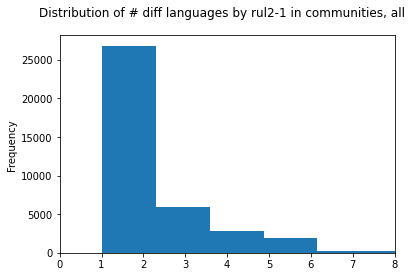

In [357]:
step2_rule1_all_group_mem=repos_lang_multi_all.groupby(['Membership'])['language'].nunique()
step2_rule1_all_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule1_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-1 in communities, all")

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-1 in communities, 70')

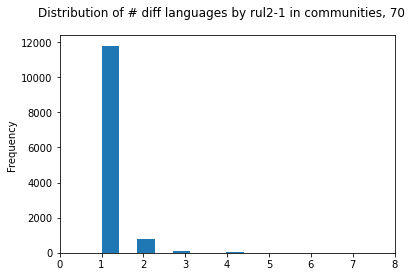

In [358]:
step2_rule1_70_group_mem=step2_rule1_70_bytes.groupby(['Membership'])['language'].nunique()
step2_rule1_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule1_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-1 in communities, 70")


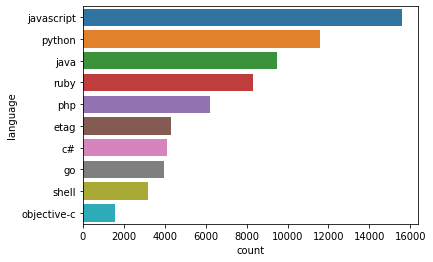

In [30]:
sns.countplot(y="language", data=step2_rule1_70_bytes,
              order = step2_rule1_70_bytes['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step2 rule1_70_top10.png')

## Ste2-Rule2: number of Langueges_commit (70%-all)


In [359]:
One_languege_repos_m['mean_commit_user'] = One_languege_repos_m.groupby(["login", 'language'])['commits'].transform('mean') #70

In [360]:
repos_m['mean_commit_user'] = repos_m.groupby(["login", 'language'])['commits'].transform("mean")#all

In [361]:
repos_Lang_commit_multi = One_languege_repos_m.loc[One_languege_repos_m['commits']>One_languege_repos_m["mean_commit_user"]]# 70%

In [362]:
repos_Lang_commit_multi_all = repos_m.loc[repos_m['commits']>repos_m["mean_commit_user"]]# all

In [363]:
step2_rule2_70_commit = repos_Lang_commit_multi [['login', 'language', 'Membership']].dropna()# 70

In [403]:
step2_rule2_all_commit= repos_Lang_commit_multi_all [['login', 'language', 'Membership']].dropna()# all

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-2 in communities, 70')

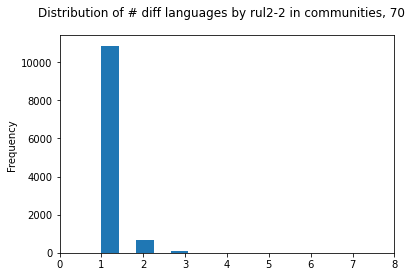

In [365]:
step2_rule2_70_group_mem=step2_rule2_70_commit.groupby(['Membership'])['language'].nunique()
step2_rule2_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule2_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-2 in communities, 70")

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-2 in communities, all')

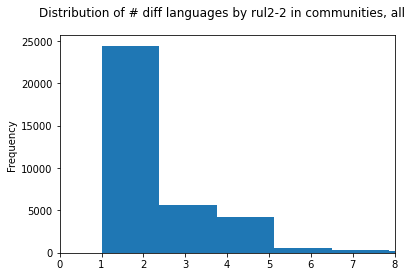

In [383]:
step2_rule2_all_group_mem=step2_rule2_commit_all.groupby(['Membership'])['language'].nunique()
step2_rule2_all_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule2_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-2 in communities, all")

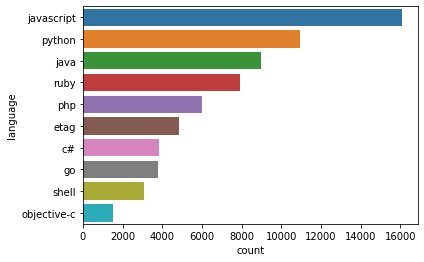

In [366]:
sns.countplot(y="language", data=step2_rule2_70_commit,
              order = step2_rule2_70_commit['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step2 rule2_70_top10.png')

### #### Wilcoxon rank som--Man whittny Step2 rule1 vs rule2 70 , all

alpha_bonferoni = 0.00029069767441860465
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0
rejected nulls: {}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba5561aed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba55618d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba55548f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba55615dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba5560ef50>],
 'means': []}

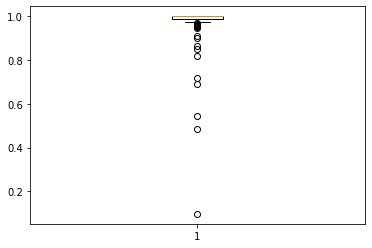

In [411]:
#Step 2 rule2 vs rule2 70
Step2_rule2_70=step2_rule2_70_commit[['Membership','language']].dropna()
Step2_rule1_70 = step2_rule1_70_bytes[['Membership','language']].dropna()

Step2_rule2_70_crosstab=pd.crosstab(Step2_rule2_70['Membership'],Step2_rule2_70['language'])
Step2_rule1_70_crosstab=pd.crosstab(Step2_rule1_70['Membership'],Step2_rule1_70['language'])


Step2_rule1vs2_70_nonshared_rows=set(Step2_rule1_70_crosstab.index)-set(Step2_rule1_70_crosstab.index).intersection(set(Step2_rule2_70_crosstab.index))# index is the membership here
Step2_rule1vs2_70_nonshared_columns=set(Step2_rule1_70_crosstab.columns)-set(Step2_rule1_70_crosstab.columns).intersection(set(Step2_rule2_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rule1_70_crosstab_r2=Step2_rule1_70_crosstab.drop(columns=Step2_rule1vs2_70_nonshared_columns ) 
Step2_rule1_70_crosstab_r2=Step2_rule1_70_crosstab_r2.drop(index=Step2_rule1vs2_70_nonshared_rows )

step2_rule1_vs_rule2_pvalue = dict()

n=0 # number of the tests
for column in Step2_rule1_70_crosstab_r2.columns:
    step2_rule1_vs_rule2_pvalue[column] = stats.ranksums(Step2_rule1_70_crosstab_r2[column], Step2_rule2_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule1vs2={}
for j,i in list(step2_rule1_vs_rule2_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule1vs2[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:',rejected_nulls_step2_rule1vs2)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule1_vs_rule2_pvalue.items():
    a.append(step2_rule1_vs_rule2_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.0001597444089456869
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0
rejected nulls: {}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba5542b350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba554284d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba553c2750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba55423650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba55423bd0>],
 'means': []}

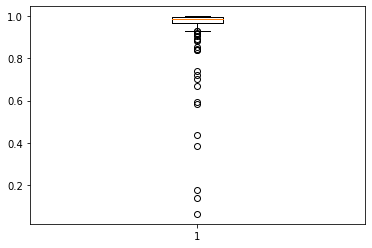

In [405]:
#Step 1 rule2 vs rule2 all

Step2_rule2_all=step2_rule2_all_commit[['Membership','language']].dropna()
Step2_rule1_all = step2_rule1_all_bytes[['Membership','language']].dropna()

Step2_rule2_all_crosstab=pd.crosstab(Step2_rule2_all['Membership'],Step2_rule2_all['language'])
Step2_rule1_all_crosstab=pd.crosstab(Step2_rule1_all['Membership'],Step2_rule1_all['language'])


Step2_rule1vs2_all_nonshared_rows=set(Step2_rule1_all_crosstab.index)-set(Step2_rule1_all_crosstab.index).intersection(set(Step2_rule2_all_crosstab.index))# index is the membership here
Step2_rule1vs2_all_nonshared_columns=set(Step2_rule1_all_crosstab.columns)-set(Step2_rule1_all_crosstab.columns).intersection(set(Step2_rule2_all_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rule1_all_crosstab_r2=Step2_rule1_all_crosstab.drop(columns=Step2_rule1vs2_all_nonshared_columns ) 
Step2_rule1_all_crosstab_r2=Step2_rule1_all_crosstab_r2.drop(index=Step2_rule1vs2_all_nonshared_rows )

step2_rule1_vs_rule2_pvalue_all = dict()

n=0 # number of the tests
for column in Step2_rule1_all_crosstab_r2.columns:
    step2_rule1_vs_rule2_pvalue_all[column] = stats.ranksums(Step2_rule1_all_crosstab_r2[column], Step2_rule2_all_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule1vs2_all={}
for j,i in list(step2_rule1_vs_rule2_pvalue_all.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule1vs2_all[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls:',rejected_nulls_step2_rule1vs2_all)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule1_vs_rule2_pvalue_all.items():
    a.append(step2_rule1_vs_rule2_pvalue_all[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)



## Step 2-Rule3: number of Langueges_Majority_1

In [384]:
Login_lang_majority_multi=One_languege_repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(One_languege_repos_m,on=["login", "language"],how='right').fillna(value=0)#70

In [385]:
Login_lang_majority_multi_all = repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(repos_m,on=["login", "language"],how='right').fillna(value=0)#all

In [386]:
Login_lang_majority_multi['mean_Lang_count']= Login_lang_majority_multi.groupby(["login"])['Lng-count'].transform('mean')#70

In [387]:
Login_lang_majority_multi_all['mean_Lang_count']= Login_lang_majority_multi_all.groupby(["login"])['Lng-count'].transform('mean')#all

In [388]:
Login_lang_majority_multi = Login_lang_majority_multi.loc[Login_lang_majority_multi['Lng-count']>Login_lang_majority_multi["mean_Lang_count"]]# 70%

In [389]:
Login_lang_majority_multi_all = Login_lang_majority_multi_all.loc[Login_lang_majority_multi_all['Lng-count']>Login_lang_majority_multi_all["mean_Lang_count"]]# all%

In [390]:
step2_rule3_70_majority = Login_lang_majority_multi [['login', 'language', 'Membership']].dropna()# 70

In [391]:
step2_rule3_70_majority_all = Login_lang_majority_multi_all [['login', 'language', 'Membership']].dropna()# 70

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-3 in communities, 70')

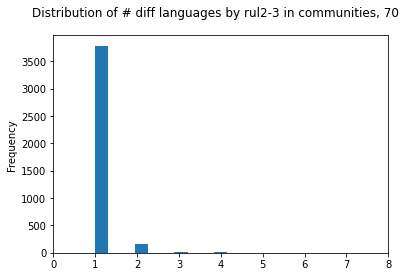

In [392]:
step2_rule3_70_group_mem=step2_rule3_70_majority.groupby(['Membership'])['language'].nunique()
step2_rule3_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule3_70_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-3 in communities, 70")

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-3 in communities, all')

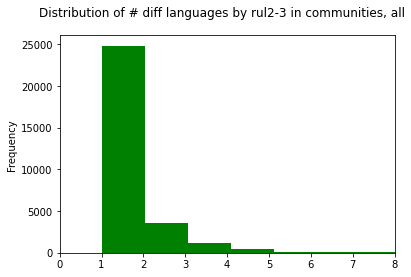

In [393]:
step2_rule3_all_group_mem=step2_rule3_70_majority_all.groupby(['Membership'])['language'].nunique()
step2_rule3_all_group_mem.plot.hist(bins = 200,color='green', xlim=(0,8))#70
plt.savefig('step2_rule3_all_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-3 in communities, all")

### Wilcoxon rank som--Man whittny Step2 rule1 vs rule3, rule2 70 , all

alpha_bonferoni = 0.00037313432835820896
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0
rejected nulls {}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba55524750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba55520dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba553fbc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba5551ead0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba5551be90>],
 'means': []}

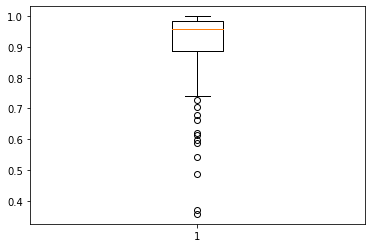

In [407]:
#Step 2 rule1 vs rule3 70
Step2_rule3_70=step2_rule3_70_majority[['Membership','language']].dropna()
Step2_rule1_70 = step2_rule1_70_bytes[['Membership','language']].dropna()

Step2_rule3_70_crosstab=pd.crosstab(Step2_rule3_70['Membership'],Step2_rule3_70['language'])
Step2_rule1_70_crosstab=pd.crosstab(Step2_rule1_70['Membership'],Step2_rule1_70['language'])


Step2_rule1vs3_70_nonshared_rows=set(Step2_rule1_70_crosstab.index)-set(Step2_rule1_70_crosstab.index).intersection(set(Step2_rule3_70_crosstab.index))# index is the membership here
Step2_rule1vs3_70_nonshared_columns=set(Step2_rule1_70_crosstab.columns)-set(Step2_rule1_70_crosstab.columns).intersection(set(Step2_rule3_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rule1_70_crosstab_r3=Step2_rule1_70_crosstab.drop(columns=Step2_rule1vs3_70_nonshared_columns ) 
Step2_rule1_70_crosstab_r3=Step2_rule1_70_crosstab_r3.drop(index=Step2_rule1vs3_70_nonshared_rows )

step2_rule1_vs_rule3_pvalue = dict()

n=0 # number of the tests
for column in Step2_rule1_70_crosstab_r3.columns:
    step2_rule1_vs_rule3_pvalue[column] = stats.ranksums(Step2_rule1_70_crosstab_r3[column], Step2_rule3_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule1vs3={}
for j,i in list(step2_rule1_vs_rule3_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule1vs3[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls', rejected_nulls_step2_rule1vs3)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule1_vs_rule3_pvalue.items():
    a.append(step2_rule1_vs_rule3_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00037313432835820896
number of rejected nulls with bonferoni adjustment =  0
number of rejected nulls =  0
rejected nulls {}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba555eb990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba555e9450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba55583290>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba555e3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba555e33d0>],
 'means': []}

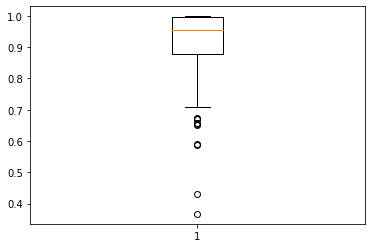

In [410]:
#Step 2 rule2 vs rule3 70
Step2_rule2_70=step2_rule2_70_commit[['Membership','language']].dropna()
Step2_rule3_70=step2_rule3_70_majority[['Membership','language']].dropna()

Step2_rule2_all_crosstab=pd.crosstab(Step2_rule2_all['Membership'],Step2_rule2_all['language'])
Step2_rule3_70_crosstab=pd.crosstab(Step2_rule3_70['Membership'],Step2_rule3_70['language'])


Step2_rule2vs3_70_nonshared_rows=set(Step2_rule2_70_crosstab.index)-set(Step2_rule2_70_crosstab.index).intersection(set(Step2_rule3_70_crosstab.index))# index is the membership here
Step2_rule2vs3_70_nonshared_columns=set(Step2_rule2_70_crosstab.columns)-set(Step2_rule2_70_crosstab.columns).intersection(set(Step2_rule3_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rule2_70_crosstab_r3=Step2_rule2_70_crosstab.drop(columns=Step2_rule2vs3_70_nonshared_columns ) 
Step2_rul2_70_crosstab_r3=Step2_rule2_70_crosstab_r3.drop(index=Step2_rule2vs3_70_nonshared_rows )

step2_rule2_vs_rule3_pvalue = dict()

n=0 # number of the tests
for column in Step2_rul2_70_crosstab_r3.columns:
    step2_rule2_vs_rule3_pvalue[column] = stats.ranksums(Step2_rul2_70_crosstab_r3[column], Step2_rule3_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule2vs3={}
for j,i in list(step2_rule2_vs_rule3_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule2vs3[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls', rejected_nulls_step2_rule2vs3)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule2_vs_rule3_pvalue.items():
    a.append(step2_rule2_vs_rule3_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

## Step2-Rule4: by ownership, _1(70% + all)

In [412]:
#if owner and login the same, keep the row, or bytes>100, i.e keep all if they own, if they don’t own use rule byte threshold

repos_ownership = One_languege_repos_m.loc[(One_languege_repos_m['owner'] ==One_languege_repos_m['login']) | (One_languege_repos_m['bytes'] > One_languege_repos_m['mean_bytes_user'])]#70 for multi

In [413]:
Step2_rule4_70_ownership =repos_ownership[['login', 'language', 'Membership']].dropna()# 70

In [415]:
repos_ownership_all = repos_m.loc[(repos_m['owner'] ==repos_m['login']) | (repos_m['bytes'] > repos_m['mean_bytes_user'])]#all for multi

In [416]:
Step2_rule4_all_ownership =repos_ownership_all[['login', 'language', 'Membership']].dropna()# all

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-4 in communities, 70')

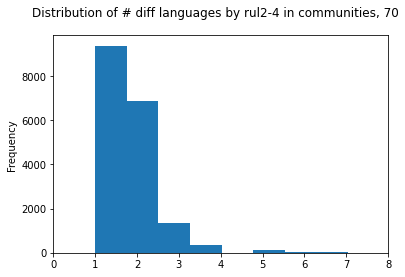

In [418]:
step2_rule4_all_group_mem=Step2_rule4_70_ownership.groupby(['Membership'])['language'].nunique()
step2_rule4_all_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule4_70_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-4 in communities, 70")

#### Wilcoxon rank som--Man whittny Step2 rule1 vs rule2,rule2,rule4 70 , 

alpha_bonferoni = 0.00028571428571428574
number of rejected nulls with bonferoni adjustment =  7
number of rejected nulls =  11
rejected nulls {'c++': 3.2710459356264835e-05, 'etag': 4.796636246351943e-31, 'html': 5.552417889811939e-06, 'java': 7.222463834166383e-15, 'javascript': 1.9559884634760867e-17, 'python': 1.5955512255973706e-32, 'shell': 2.3565895021253096e-08}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba55775910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba557733d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba5579bd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba5576edd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba5576e350>],
 'means': []}

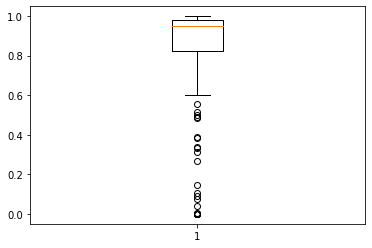

In [421]:
#Step 2 rule1 vs rule4 70
Step2_rule4_70=Step2_rule4_70_ownership[['Membership','language']].dropna()
Step2_rule1_70 = step2_rule1_70_bytes[['Membership','language']].dropna()

Step2_rule4_70_crosstab=pd.crosstab(Step2_rule4_70['Membership'],Step2_rule4_70['language'])
Step2_rule1_70_crosstab=pd.crosstab(Step2_rule1_70['Membership'],Step2_rule1_70['language'])


Step2_rule1vs4_70_nonshared_rows=set(Step2_rule1_70_crosstab.index)-set(Step2_rule1_70_crosstab.index).intersection(set(Step2_rule4_70_crosstab.index))# index is the membership here
Step2_rule1vs4_70_nonshared_columns=set(Step2_rule1_70_crosstab.columns)-set(Step2_rule1_70_crosstab.columns).intersection(set(Step2_rule4_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rule1_70_crosstab_r4=Step2_rule1_70_crosstab.drop(columns=Step2_rule1vs4_70_nonshared_columns ) 
Step2_rule1_70_crosstab_r4=Step2_rule1_70_crosstab_r4.drop(index=Step2_rule1vs4_70_nonshared_rows )

step2_rule1_vs_rule4_pvalue = dict()

n=0 # number of the tests
for column in Step2_rule1_70_crosstab_r4.columns:
    step2_rule1_vs_rule4_pvalue[column] = stats.ranksums(Step2_rule1_70_crosstab_r4[column], Step2_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule1vs4={}
for j,i in list(step2_rule1_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule1vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls', rejected_nulls_step2_rule1vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule1_vs_rule4_pvalue.items():
    a.append(step2_rule1_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

alpha_bonferoni = 0.00029069767441860465
number of rejected nulls with bonferoni adjustment =  8
number of rejected nulls =  11
rejected nulls {'c#': 0.000236084005657592, 'c++': 3.816534474773055e-05, 'etag': 1.3434587818289756e-24, 'html': 9.436447187941241e-06, 'java': 1.1289238098659208e-15, 'javascript': 1.143043029666435e-16, 'python': 2.798168017679958e-31, 'shell': 9.634922866067426e-08}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba557bae50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba557b7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba557e0dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba557b5350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba557b2890>],
 'means': []}

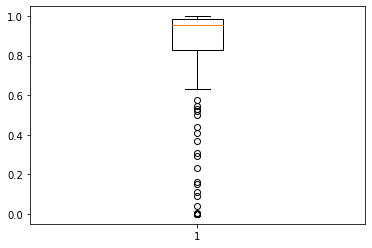

In [424]:
#Step 2 rule2 vs rule4 70
Step2_rule4_70=Step2_rule4_70_ownership[['Membership','language']].dropna()
Step2_rule2_70 = step2_rule2_70_commit[['Membership','language']].dropna()

Step2_rule4_70_crosstab=pd.crosstab(Step2_rule4_70['Membership'],Step2_rule4_70['language'])
Step2_rule2_70_crosstab=pd.crosstab(Step2_rule2_70['Membership'],Step2_rule2_70['language'])


Step2_rule2vs4_70_nonshared_rows=set(Step2_rule2_70_crosstab.index)-set(Step2_rule2_70_crosstab.index).intersection(set(Step2_rule4_70_crosstab.index))# index is the membership here
Step2_rule2vs4_70_nonshared_columns=set(Step2_rule2_70_crosstab.columns)-set(Step2_rule2_70_crosstab.columns).intersection(set(Step2_rule4_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rul2_70_crosstab_r4=Step2_rule2_70_crosstab.drop(columns=Step2_rule2vs4_70_nonshared_columns ) 
Step2_rule2_70_crosstab_r4=Step2_rul2_70_crosstab_r4.drop(index=Step2_rule2vs4_70_nonshared_rows )

step2_rule2_vs_rule4_pvalue = dict()

n=0 # number of the tests
for column in Step2_rule2_70_crosstab_r4.columns:
    step2_rule2_vs_rule4_pvalue[column] = stats.ranksums(Step2_rule2_70_crosstab_r4[column], Step2_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule2vs4={}
for j,i in list(step2_rule2_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule2vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls', rejected_nulls_step2_rule2vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule2_vs_rule4_pvalue.items():
    a.append(step2_rule2_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

In [426]:
Step2_rule4_70_crosstab.shape

(18207, 254)

In [428]:
Step2_rule3_70_crosstab.shape

(4020, 134)

alpha_bonferoni = 0.00029069767441860465
number of rejected nulls with bonferoni adjustment =  8
number of rejected nulls =  11
rejected nulls {'c#': 0.0002215031153931293, 'c++': 3.70422057477415e-05, 'etag': 2.247238218718994e-24, 'html': 9.249145391004538e-06, 'java': 8.981907423711528e-16, 'javascript': 9.26697662900385e-17, 'python': 1.9273538355653636e-31, 'shell': 1.2134562452444277e-07}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba557ec4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba55868a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba55818790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba55865d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba55865350>],
 'means': []}

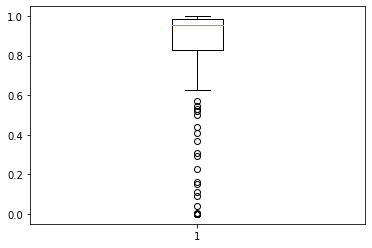

In [429]:
#Step 2 rule3 vs rule4 70
Step2_rule4_70=Step2_rule4_70_ownership[['Membership','language']].dropna()
Step2_rule3_70 = step2_rule3_70_majority[['Membership','language']].dropna()

Step2_rule4_70_crosstab=pd.crosstab(Step2_rule4_70['Membership'],Step2_rule4_70['language'])
Step2_rule3_70_crosstab=pd.crosstab(Step2_rule3_70['Membership'],Step2_rule3_70['language'])


Step2_rule3vs4_70_nonshared_rows=set(Step2_rule4_70_crosstab.index)-set(Step2_rule4_70_crosstab.index).intersection(set(Step2_rule3_70_crosstab.index))# index is the membership here
Step2_rule3vs4_70_nonshared_columns=set(Step2_rule4_70_crosstab.columns)-set(Step2_rule4_70_crosstab.columns).intersection(set(Step2_rule3_70_crosstab.columns))


## revised columns in rule1: drop those not in ruls
Step2_rul4_70_crosstab_r3=Step2_rule4_70_crosstab.drop(columns=Step2_rule3vs4_70_nonshared_columns ) 
Step2_rule4_70_crosstab_r3=Step2_rul4_70_crosstab_r3.drop(index=Step2_rule3vs4_70_nonshared_rows )

step2_rule3_vs_rule4_pvalue = dict()

n=0 # number of the tests
for column in Step2_rul3_70_crosstab_r4.columns:
    step2_rule3_vs_rule4_pvalue[column] = stats.ranksums(Step2_rul3_70_crosstab_r4[column], Step2_rule4_70_crosstab[column]).pvalue
    n=n+1
alpha_bonf = 0.05/n
print("alpha_bonferoni =", alpha_bonf )
count = 0
k = 0
rejected_nulls_step2_rule3vs4={}
for j,i in list(step2_rule3_vs_rule4_pvalue.items()) : 
    if i < alpha_bonf : 
        count = count + 1
        rejected_nulls_step2_rule3vs4[j]=i
    if i< 0.05:
        k = k+1
print('number of rejected nulls with bonferoni adjustment = ', count)  
print('number of rejected nulls = ', k) 
print('rejected nulls', rejected_nulls_step2_rule3vs4)
#a= list(step1_rule1_vs_rule2_pvalue.values())
a = []
for k, v in step2_rule3_vs_rule4_pvalue.items():
    a.append(step2_rule3_vs_rule4_pvalue[k])
#plt.hist(a,  density=True, bins=30)
plt.boxplot(a)

# Experiment 

In [82]:
#Example for me# values of  key(community i)=r[i]
# for each community 
d = { 1 : ['z','a',"nmn"], 
2 :'b', 
3 :  ['am'], 
4 : ['nm', 'gbn'] } 
reversed_d = {val: key for key in d for val in d[key]}
m_hist={}
for k , v in d.items():
    m_hist[k] = len(d[k])  
rm = []                                                                             
for i in d.values():
    rm.append(i) 

In [83]:
df = pd.DataFrame({'A' : ['foo', 'foo', 'bar', 'bar', 'foo','Zi'],
                   'B' : [1,2,3,2,3,6],
                   'D' :[1,2,5,2,3,7],
                   'C' : ["X", 'X', 'Y', 'X', 'Y','Z']})

In [93]:
df[['A','C']]

,A,C
0,foo,X
1,foo,X
2,bar,Y
3,bar,X
4,foo,Y
5,Zi,Z


In [101]:
df[['A','C']].value_counts(normalize=True)

A    C
foo  X    0.333333
     Y    0.166667
bar  Y    0.166667
     X    0.166667
Zi   Z    0.166667
dtype: float64

0.16666666666666666

In [84]:
df2 = pd.DataFrame({'A' : ['foo', 'foo', 'bar', 'bar', 'foo','Zi'],
                   'B' : [11000,2,4,2,3,6],
                   'D' :[1,2,5,2,3,7],
                   'C' : ["X", 'X', 'Y', 'X', 'Y','Z']})

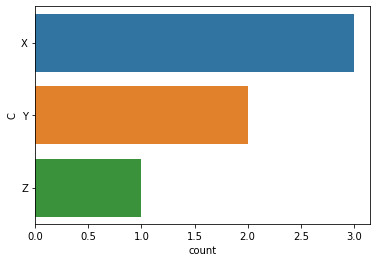

In [85]:
sns.countplot(y="C", data=df,
              order = df['C'].value_counts().iloc[:10].index)
plt.savefig('C.png')

In [86]:
sum(df['B']!=df2['B'])

2

In [87]:
df2['B']

0    11000
1        2
2        4
3        2
4        3
5        6
Name: B, dtype: int64

In [88]:
dfn=df.merge(right=df2,left_on=[df.A,df.B],right_on=[df2.A,df2.B], indicator=True, how='left')##nope

In [89]:
dfn

,key_0,key_1,A_x,B_x,D_x,C_x,A_y,B_y,D_y,C_y,_merge
0,foo,1,foo,1,1,X,NaN,NaN,NaN,NaN,left_only
1,foo,2,foo,2,2,X,foo,2.0,2.0,X,both
2,bar,3,bar,3,5,Y,NaN,NaN,NaN,NaN,left_only
3,bar,2,bar,2,2,X,bar,2.0,2.0,X,both
4,foo,3,foo,3,3,Y,foo,3.0,3.0,Y,both
5,Zi,6,Zi,6,7,Z,Zi,6.0,7.0,Z,both


In [90]:
#dfnew = df.merge(df2, how = 'outer',on="A" ,indicator='check').loc[lambda x : x['_merge']=='left']

In [219]:
dfnew1

,A,B_x,D_x,C_x,B_y,D_y,C_y,check
0,foo,1,1,X,11000,1,X,both
1,foo,1,1,X,2,2,X,both
2,foo,1,1,X,3,3,Y,both
3,foo,2,2,X,11000,1,X,both
4,foo,2,2,X,2,2,X,both
5,foo,2,2,X,3,3,Y,both
6,foo,3,3,Y,11000,1,X,both
7,foo,3,3,Y,2,2,X,both
8,foo,3,3,Y,3,3,Y,both
9,bar,3,5,Y,4,5,Y,both


In [135]:
dfnew

,A,B,D,C,_merge,check
0,foo,11000,1,X,right_only,both
1,bar,4,5,Y,right_only,both


In [74]:
fl= df.groupby(['A','C']).size().to_frame('countl')

In [78]:
fl

countl
A   C        
Zi  Z       1
bar X       1
    Y       1
foo X       2
    Y       1

In [77]:
fl.value_counts()

countl
1         4
2         1
dtype: int64

In [158]:
 fm=df.groupby(['A','C']).size().to_frame('countl').reset_index().merge(df,on=['A', 'C'],how='right').fillna(value=0)#works

In [198]:
fm['meancount']= fm.groupby(["A"])['countl'].transform('mean')#70

In [199]:
fm

,A,C,countl,B,D,maxcount,meancount
0,foo,X,2,1,1,1.666667,1.666667
1,foo,X,2,2,2,1.666667,1.666667
2,bar,Y,1,3,5,1.000000,1.000000
3,bar,X,1,2,2,1.000000,1.000000
4,foo,Y,1,3,3,1.666667,1.666667
5,Zi,Z,1,6,7,1.000000,1.000000


In [169]:
fmh = fm.loc[fm['countl']==fm['maxcount']]

In [170]:
fmh 

,A,C,countl,B,D,maxcount
0,foo,X,2,1,1,2
1,foo,X,2,2,2,2
2,bar,Y,1,3,5,1
3,bar,X,1,2,2,1
5,Zi,Z,1,6,7,1


In [171]:
v=fmh.sort_values('D', ascending=False).drop_duplicates(subset=['A','maxcount'])###yes!!!

In [172]:
v

,A,C,countl,B,D,maxcount
5,Zi,Z,1,6,7,1
2,bar,Y,1,3,5,1
1,foo,X,2,2,2,2


In [173]:
v.loc[v.A=='bar']#70

,A,C,countl,B,D,maxcount
2,bar,Y,1,3,5,1


In [174]:
#fm.sort_values('count').drop_duplicates(['A','C'], keep='first')

In [190]:
n=fm.groupby(['A', 'C'])['D'].quantile([ 0.75]).reset_index()


In [191]:
n


,A,C,level_2,D
0,Zi,Z,0.75,7.00
1,bar,X,0.75,2.00
2,bar,Y,0.75,5.00
3,foo,X,0.75,1.75
4,foo,Y,0.75,3.00


In [179]:
fm= df.groupby(["A"])["C"].value_counts()

In [ ]:
#pd.merge(df, f_maj, on=['A','C'], how='inner',suffixes=('B','D'))

In [161]:
 f_maj.head()

A    C
Zi   Z    1
bar  X    1
     Y    1
foo  X    2
     Y    1
dtype: int64

see if this works

In [107]:
df_own = df.loc[df['B']==df['D']]

In [108]:
df_own

,A,B,D,C
0,foo,1,1,X
1,foo,2,2,X
3,bar,2,2,X
4,foo,3,3,Y


In [167]:
df['majo']= df.groupby(["A"])["C"].transform('count')#doesnt work for counting x...

In [166]:
df

,A,B,D,C,Lnge-count,majo
0,foo,1,1,X,3,3
1,foo,2,2,X,3,3
2,bar,3,5,Y,2,2
3,bar,2,2,X,2,2
4,foo,3,3,Y,3,3
5,Zi,6,7,Z,1,1


In [110]:
def flag_df(v1,v2,v3,v4,v5):

    if (df[v2] == df[v3]):
        df[v5] = df [v4]
    elif (df[v2] != df[v3]) and (df[v3]>2):
         df[v5] = df[v3]

In [111]:
df_owner = flag_df('A','B','D','C','CC')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [117]:
df2 = df.loc[(df['B'] ==df['D']) | (df['D'] > 7)]


In [119]:
df2

,A,B,D,C
0,foo,1,1,X
1,foo,2,2,X
3,bar,2,2,X
4,foo,3,3,Y


In [101]:
[i for i in df['D']]

[1, 2, 5, 2, 3]

NameError: name 'df' is not defined